In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
from collections import Counter
import ast
import os
import csv
from datetime import date, datetime, timedelta
# initalize wd to visualization folder
os.chdir(r'C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization')
print(os.getcwd())

C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization


# Top 5 (Pie) and Top 10 (Donut) Companies Mentioned in Company Twits
## Make Pie and Donut Chart

In [2]:
def MakePieChart(data, symbol, timeSeries):
    getCount = Counter(k['symbol'] for k in data if dict(k).get('symbol'))
    symbolCount = dict(getCount)
    symbolCount[symbol] = 0
    symbolCount = {k: v for k, v in sorted(symbolCount.items(), key=lambda item: item[1], reverse=True)}
    fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(aspect="equal"))
    cnt = 0
    data = []
    symbols = []
    for key in symbolCount.keys():
        data.append(symbolCount[key])
        symbols.append(key)
        cnt += 1
        if cnt >= 5:
            break

    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}%\n({:d} twits)".format(pct, absolute)
    #explode = (0.1,0,0,0,0)
    
    wedges, texts, autotexts = ax.pie(data, 
                                      #explode=explode, 
                                      shadow=True, autopct=lambda pct: func(pct, data), textprops=dict(color="w", fontsize=30))

    ax.legend(wedges, symbols,
            fontsize='large',
            title_fontsize='large',
            title="Symbols",
            loc="center left",
            bbox_to_anchor=(1, 0, 0.5, 1))
    plt.setp(autotexts, size=8, weight="bold")
    #ax.set_title("Top Five Companies Mentioned in " + symbol + " Twits", fontsize='large')
    
    os.chdir(r'C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs')
    plt.savefig(symbol+'TopFiveOtherCompanies'+timeSeries+'.png', optimize=True) # VolumeWeekly, VolumeMonthly, VolumeYearly
    print('saved '+symbol+'TopFiveOtherCompanies'+timeSeries+'.png to '+os.getcwd())
    #plt.show()

def MakeDonutChart(data,symbol,timeSeries):
    getCount = Counter(k['symbol'] for k in data if dict(k).get('symbol'))
    symbolCount = dict(getCount)
    symbolCount[symbol] = 0
    symbolCount = {k: v for k, v in sorted(symbolCount.items(), key=lambda item: item[1], reverse=True)}
    fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(aspect="equal"))

    cnt = 0
    data = []
    symbols = []
    recipe = []
    for key in symbolCount.keys():
        data.append(symbolCount[key])
        symbols.append(key)
        recipe.append(key + ' - ' + str(symbolCount[key]) + ' twits')
        cnt += 1
        if cnt >= 10:
            break
    #explode = (0.1,0,0,0,0,0,0,0,0,0)

    wedges, texts = ax.pie(data, 
                           #explode=explode, 
                           shadow=True, wedgeprops=dict(width=0.5), startangle=-40)

    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"),
              bbox=bbox_props, zorder=0, va="center")

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                    horizontalalignment=horizontalalignment, **kw)

    ax.legend(wedges, symbols,
            fontsize='large',
            title_fontsize='large',
            title="Symbols",
            loc="center",
            frameon=False)
            #bbox_to_anchor=(1, 0, 0.5, 1))
    #ax.set_title("Top Ten Companies Mentioned in " + symbol + " Twits", fontsize=30, pad=50)

    os.chdir(r'C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs')
    plt.savefig(symbol+'TopTenOtherCompanies'+timeSeries+'.png', optimize=True)
    print('saved '+symbol+'TopTenOtherCompanies'+timeSeries+'.png to '+os.getcwd())
    #plt.show()

## Count Other Companies for Pie and Donut Chart

In [3]:
def GetOtherCompanies(fname, days='all'):
    # set wd to data\StockTwits
    os.chdir(r'C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\data\StockTwits')
    df = pd.read_csv(fname)
    df['Date'] = df['created'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S')) # save time string as datetime
    to_ignore = fname[:-10]
    stock_ds = []
    if days == 'lastWeek':
        lastweekdate = pd.to_datetime('today').floor('D') - timedelta(7)
        df = df[df.Date >= lastweekdate]
        for row in df.newSymbols:
            lists = ast.literal_eval(row)
            for diction in lists:
                stock_ds.append(diction)
        MakePieChart(stock_ds, to_ignore, 'LastWeek')
        MakeDonutChart(stock_ds, to_ignore, 'LastWeek')
    elif days == 'lastMonth':
        lastmonthdate = pd.to_datetime('today').floor('D') - timedelta(30)
        df = df[df.Date >= lastmonthdate]
        for row in df.newSymbols:
            lists = ast.literal_eval(row)
            for diction in lists:
                stock_ds.append(diction)
        MakePieChart(stock_ds, to_ignore, 'LastMonth')
        MakeDonutChart(stock_ds, to_ignore, 'LastMonth')
    elif days == 'lastYear':
        lastyeardate = pd.to_datetime('today').floor('D') - timedelta(365)
        df = df[df.Date >= lastyeardate]
        for row in df.newSymbols:
            lists = ast.literal_eval(row)
            for diction in lists:
                stock_ds.append(diction)
        MakePieChart(stock_ds, to_ignore, 'LastYear')
        MakeDonutChart(stock_ds, to_ignore, 'LastYear')
    else:
        for row in df.newSymbols:
            lists = ast.literal_eval(row)
            for diction in lists:
                stock_ds.append(diction)
        MakePieChart(stock_ds, to_ignore, 'AllTime')
        MakeDonutChart(stock_ds, to_ignore, 'AllTime')

# Daily and Minute Values
## Volume Over Time

In [4]:
def GetVolume(fname, days='all'):
    # set wd to data\DailyValues
    os.chdir(r'C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\data\DailyValues')
    symbol = fname[:-9]
    df = pd.read_csv(fname)
    df['Date'] = df['time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d')) # save time string as datetime
    
    if days == 'all':
        ax = df.plot(x='Date',y='volume', figsize=(10,8), color='red')
        plt.ticklabel_format(style='plain', axis='y')
        ax.set_title(symbol+' Performance Over Time', fontsize=20)
        ax.set_xlabel('Time Period', fontsize=16)
        ax.set_ylabel('Volume', fontsize=16)
        ax.grid(True)
        os.chdir(r'C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs')
        plt.savefig(symbol+'VolumeAllTime.png', optimize=True) # VolumeWeekly, VolumeMonthly, VolumeYearly
        print('saved '+symbol+'VolumeAllTime.png to '+os.getcwd())
        #plt.show()

    elif days == 'lastWeek':
        df = df[:7]
        ax = df.plot(x='Date',y='volume', figsize=(10,8), color='red')
        plt.ticklabel_format(style='plain', axis='y')
        ax.set_title(symbol+' Performance Over Last Week', fontsize=20)
        ax.set_xlabel('Time Period', fontsize=16)
        ax.set_ylabel('Volume', fontsize=16)
        ax.grid(True)
        os.chdir(r'C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs')
        plt.savefig(symbol+'VolumeLastWeek.png', optimize=True)
        print('saved '+symbol+'VolumeLastWeek.png to '+os.getcwd())
        #plt.show()

    elif days == 'lastMonth':
        df = df[:30]
        ax = df.plot(x='Date',y='volume', figsize=(10,8), color='red')
        plt.ticklabel_format(style='plain', axis='y')
        ax.set_title(symbol+' Performance Over Last Month', fontsize=20)
        ax.set_xlabel('Time Period', fontsize=16)
        ax.set_ylabel('Volume', fontsize=16)
        ax.grid(True)
        os.chdir(r'C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs')
        plt.savefig(symbol+'VolumeLastMonth.png', optimize=True) # VolumeWeekly, VolumeMonthly, VolumeYearly
        print('saved '+symbol+'VolumeLastMonth.png to '+os.getcwd())
        #plt.show()

    elif days == 'lastYear':
        df= df[:365]
        ax = df.plot(x='Date',y='volume', figsize=(10,8), color='red')
        plt.ticklabel_format(style='plain', axis='y')
        ax.set_title(symbol+' Performance Over Last Year', fontsize=20)
        ax.set_xlabel('Time Period', fontsize=16)
        ax.set_ylabel('Volume', fontsize=16)
        ax.grid(True)
        os.chdir(r'C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs')
        plt.savefig(symbol+'VolumeLastYear.png', optimize=True) # VolumeWeekly, VolumeMonthly, VolumeYearly
        print('saved '+symbol+'VolumeLastYear.png to '+os.getcwd())
        #plt.show()

# Create Visualizations

In [5]:
stockSymbol = ["AAPL", "AMZN", "GOOGL","MSFT", "DELL", "IBM", "INTC", "HPQ",
               "FB", "CSCO", "ORCL", "HPE", "MU", "DXC", "TMO"]

## AAPL (Problem with data)

In [21]:
GetOtherCompanies('AAPL_Twits.csv', days='lastWeek')
GetOtherCompanies('AAPL_Twits.csv', days='lastMonth')
GetOtherCompanies('AAPL_Twits.csv', days='lastYear')
GetOtherCompanies('AAPL_Twits.csv')
GetVolume('AAPLDaily.csv', days='lastWeek')
GetVolume('AAPLDaily.csv', days='lastMonth')
GetVolume('AAPLDaily.csv', days='lastYear')
GetVolume('AAPLDaily.csv')

ValueError: time data '2/10/2020 20:10' does not match format '%Y-%m-%d %H:%M:%S'

## AMZN (Problem with data)

In [22]:
GetOtherCompanies('AMZN_Twits.csv', days='lastWeek')
GetOtherCompanies('AMZN_Twits.csv', days='lastMonth')
GetOtherCompanies('AMZN_Twits.csv', days='lastYear')
GetOtherCompanies('AMZN_Twits.csv')
GetVolume('AMZNDaily.csv', days='lastWeek')
GetVolume('AMZNDaily.csv', days='lastMonth')
GetVolume('AMZNDaily.csv', days='lastYear')
GetVolume('AMZNDaily.csv')

ValueError: time data '2/10/2020 20:10' does not match format '%Y-%m-%d %H:%M:%S'

## GOOGL (Problem with data)

In [8]:
GetOtherCompanies('GOOGL_Twits.csv', days='lastWeek')
GetOtherCompanies('GOOGL_Twits.csv', days='lastMonth')
GetOtherCompanies('GOOGL_Twits.csv', days='lastYear')
GetOtherCompanies('GOOGL_Twits.csv')
GetVolume('GOOGLDaily.csv', days='lastWeek')
GetVolume('GOOGLDaily.csv', days='lastMonth')
GetVolume('GOOGLDaily.csv', days='lastYear')
GetVolume('GOOGLDaily.csv')

ValueError: time data '2/10/2020 20:10' does not match format '%Y-%m-%d %H:%M:%S'

## MSFT (Problem with data)

In [23]:
GetOtherCompanies('MSFT_Twits.csv', days='lastWeek')
GetOtherCompanies('MSFT_Twits.csv', days='lastMonth')
GetOtherCompanies('MSFT_Twits.csv', days='lastYear')
GetOtherCompanies('MSFT_Twits.csv')
GetVolume('MSFTDaily.csv', days='lastWeek')
GetVolume('MSFTDaily.csv', days='lastMonth')
GetVolume('MSFTDaily.csv', days='lastYear')
GetVolume('MSFTDaily.csv')

ValueError: time data '2/10/2020 20:10' does not match format '%Y-%m-%d %H:%M:%S'

## DELL

saved DELLTopFiveOtherCompaniesLastWeek.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved DELLTopTenOtherCompaniesLastWeek.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved DELLTopFiveOtherCompaniesLastMonth.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved DELLTopTenOtherCompaniesLastMonth.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved DELLTopFiveOtherCompaniesLastYear.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved DELLTopTenOtherCompaniesLastYear.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved DELLTopFiveOtherCompaniesAllTime.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved DELLTopTenOtherC

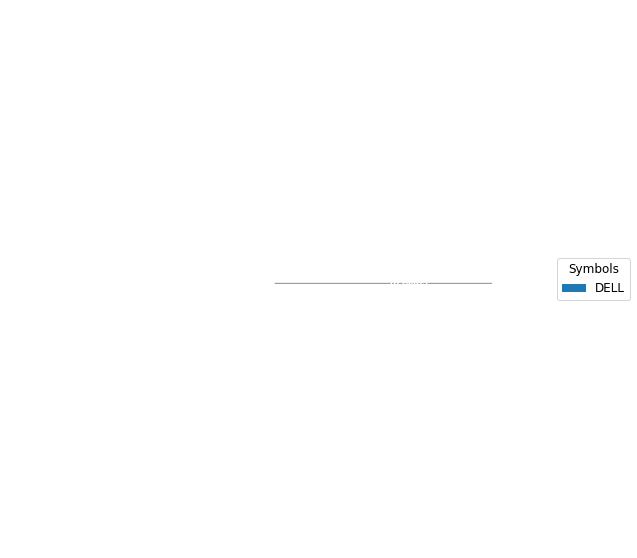

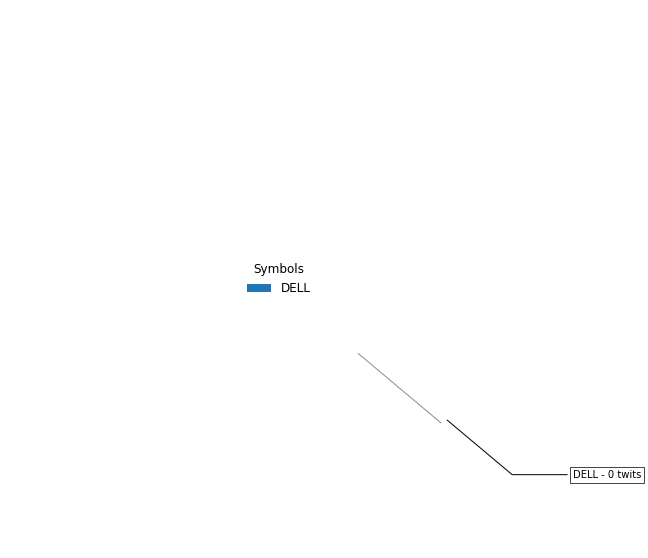

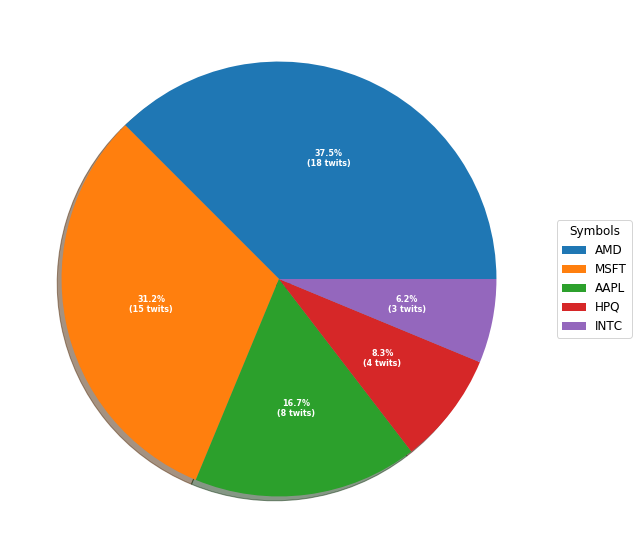

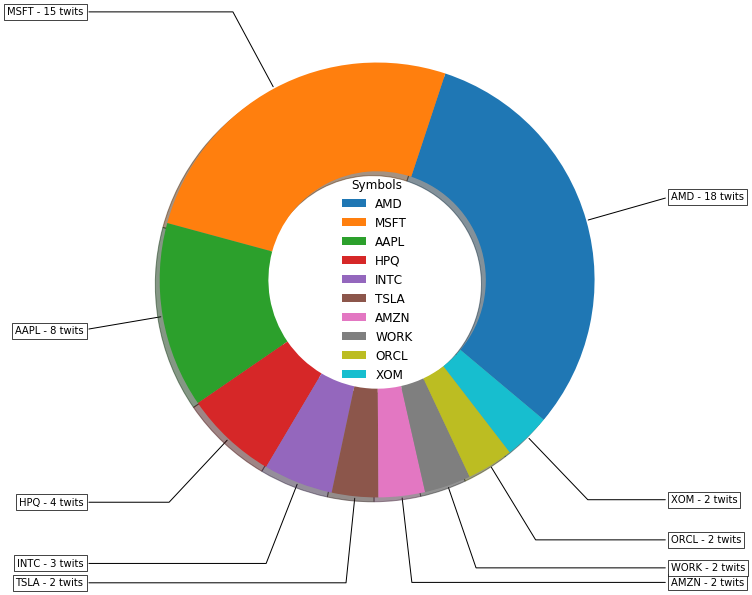

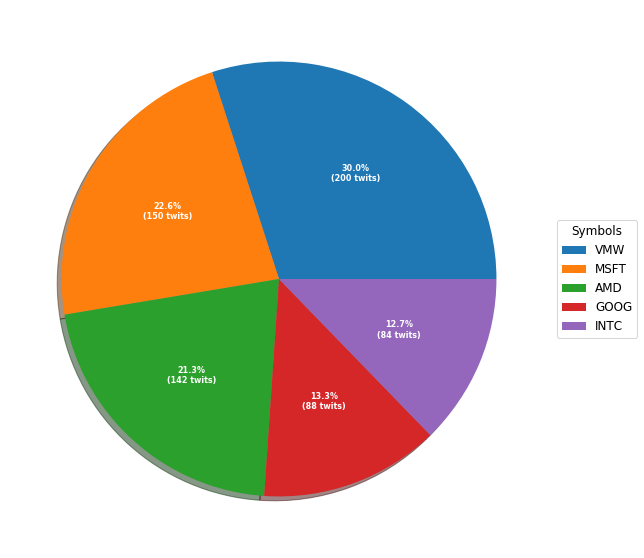

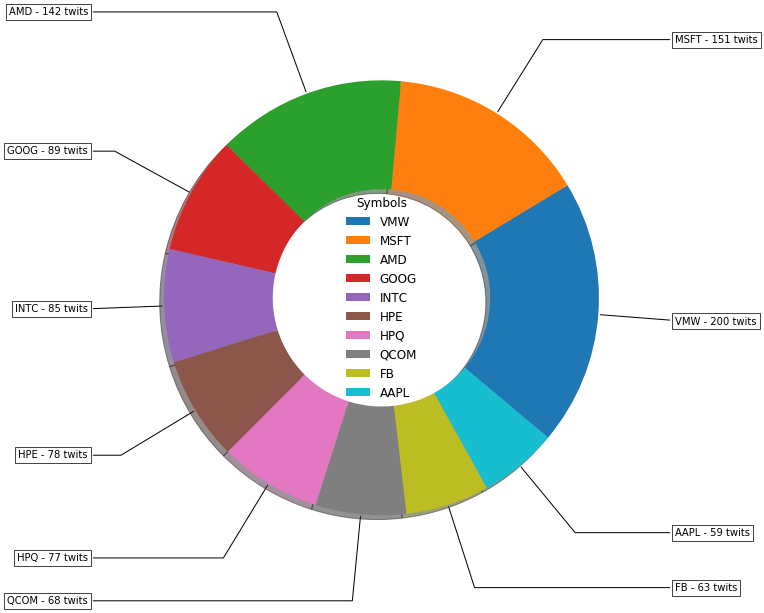

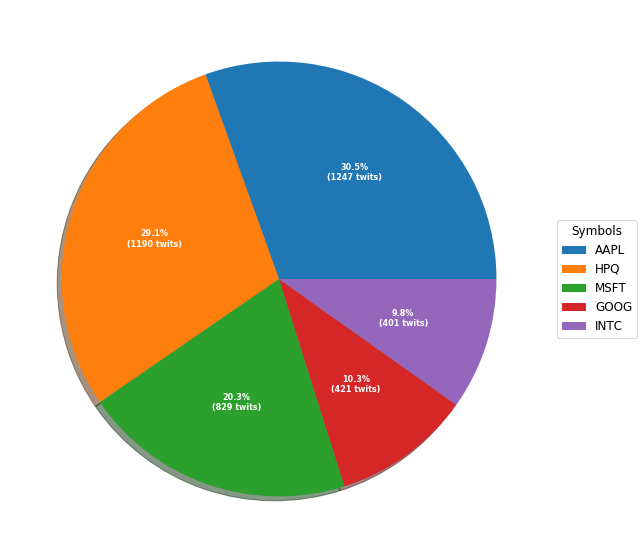

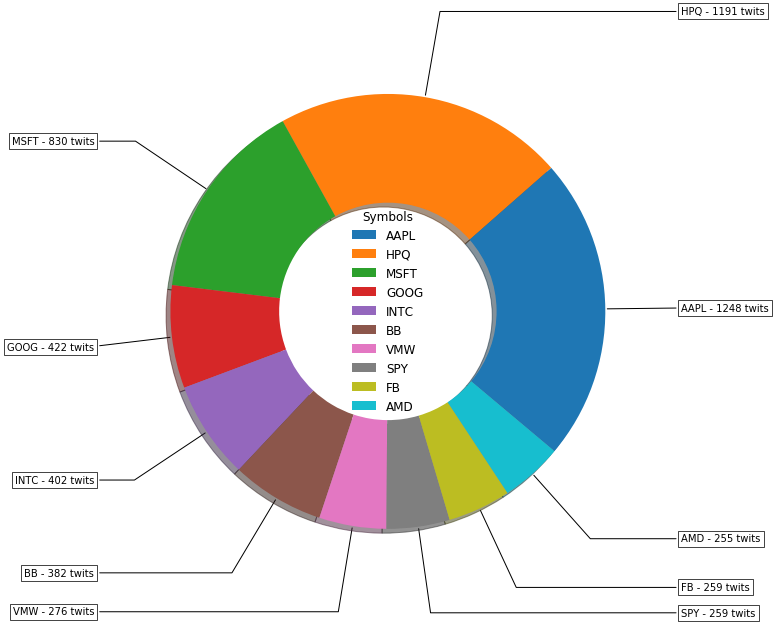

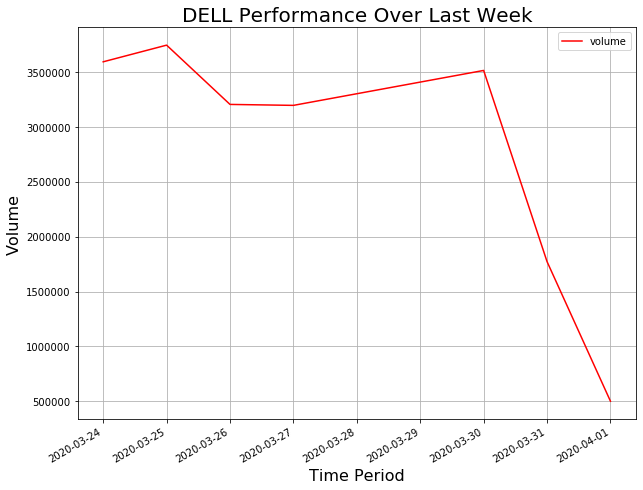

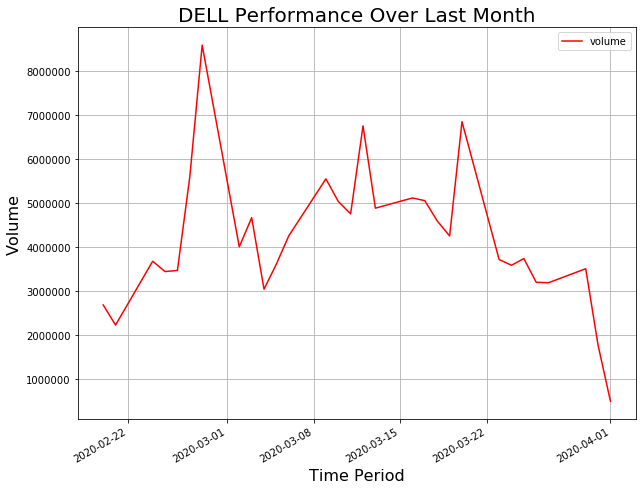

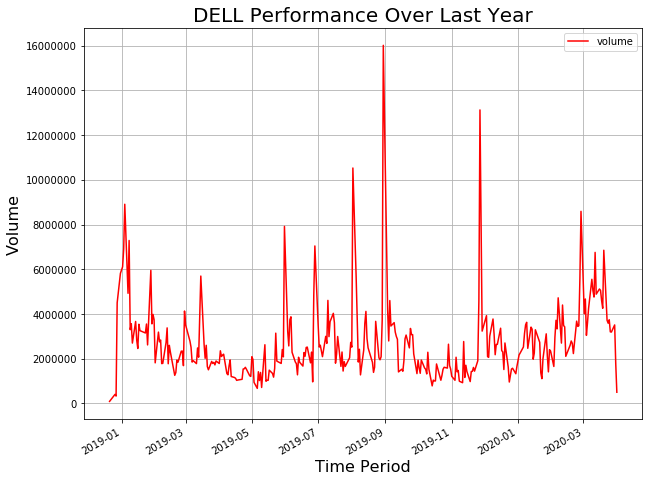

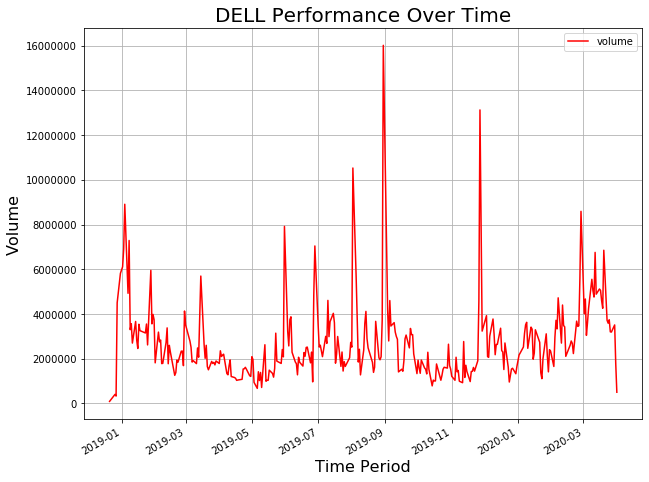

In [10]:
GetOtherCompanies('DELL_Twits.csv', days='lastWeek')
GetOtherCompanies('DELL_Twits.csv', days='lastMonth')
GetOtherCompanies('DELL_Twits.csv', days='lastYear')
GetOtherCompanies('DELL_Twits.csv')
GetVolume('DELLDaily.csv', days='lastWeek')
GetVolume('DELLDaily.csv', days='lastMonth')
GetVolume('DELLDaily.csv', days='lastYear')
GetVolume('DELLDaily.csv')

## IBM

saved IBMTopFiveOtherCompaniesLastWeek.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved IBMTopTenOtherCompaniesLastWeek.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved IBMTopFiveOtherCompaniesLastMonth.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved IBMTopTenOtherCompaniesLastMonth.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved IBMTopFiveOtherCompaniesLastYear.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved IBMTopTenOtherCompaniesLastYear.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved IBMTopFiveOtherCompaniesAllTime.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved IBMTopTenOtherCompanies

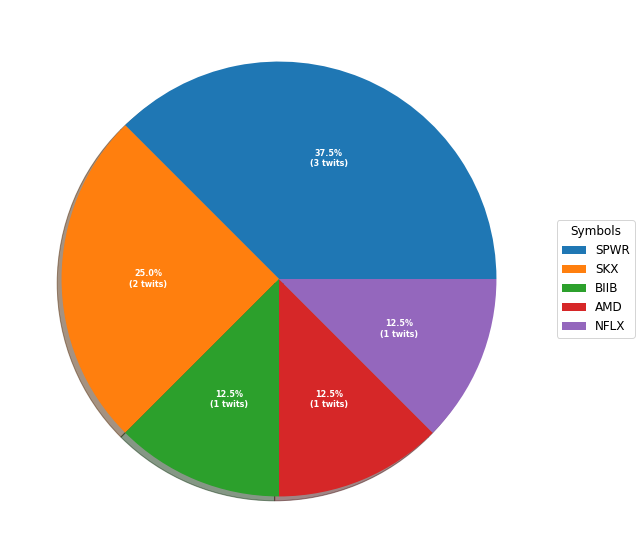

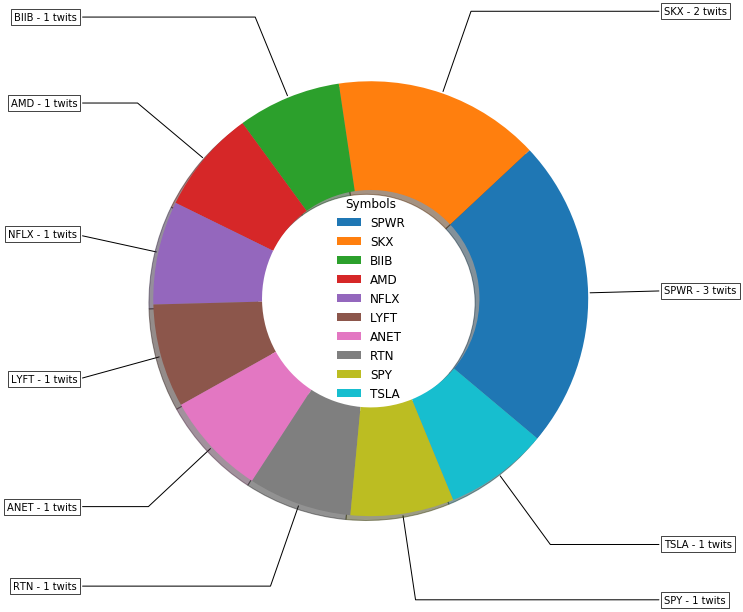

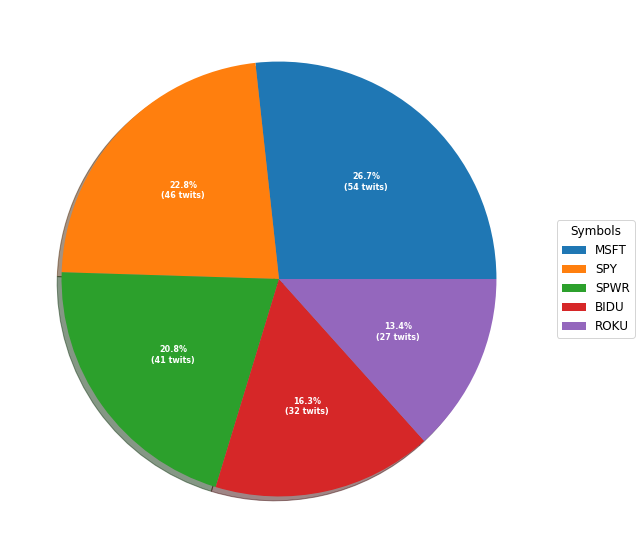

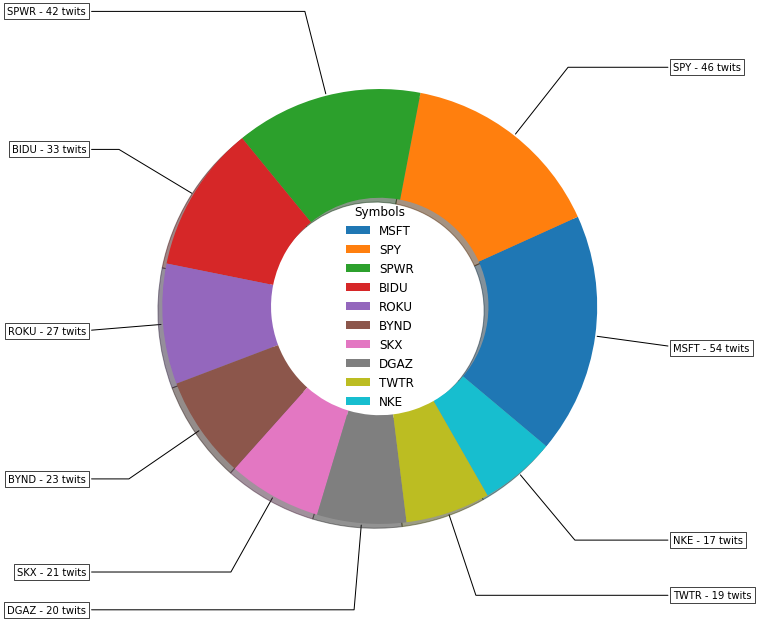

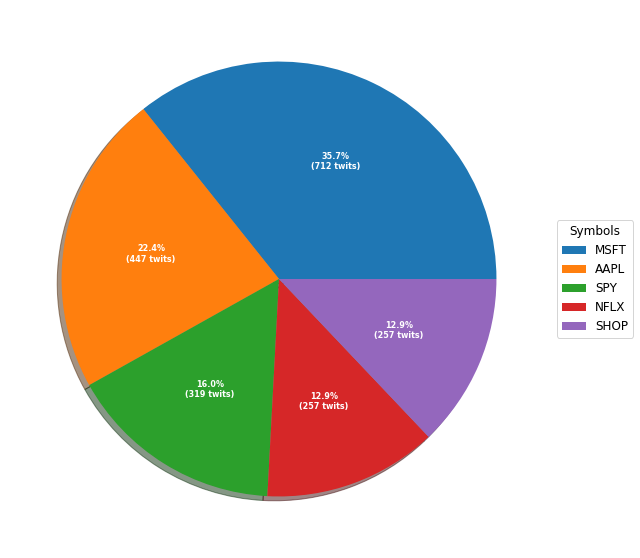

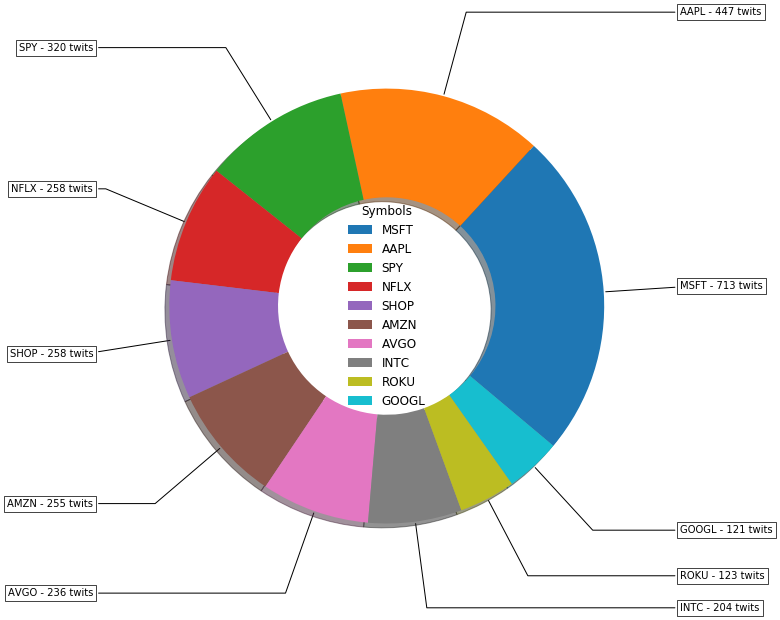

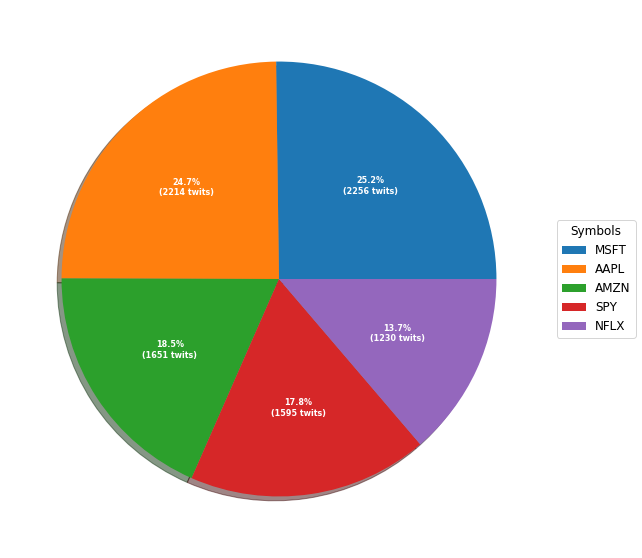

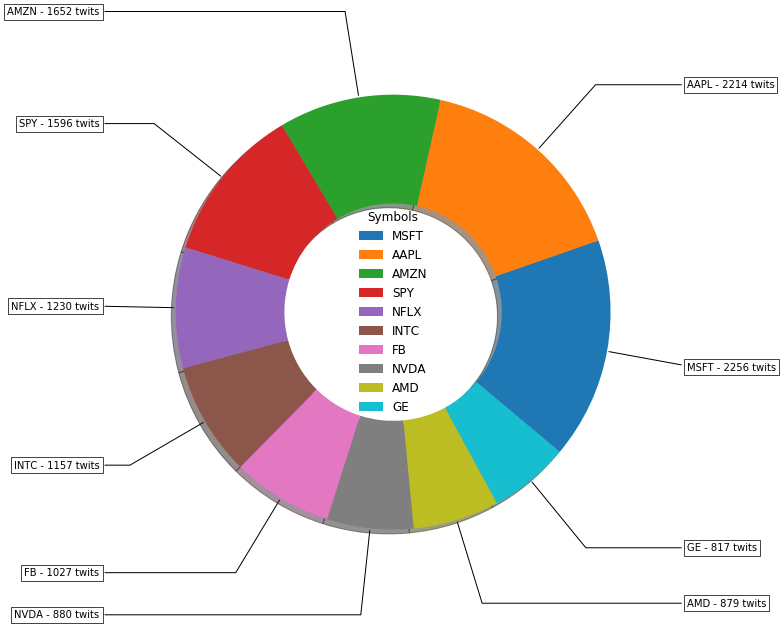

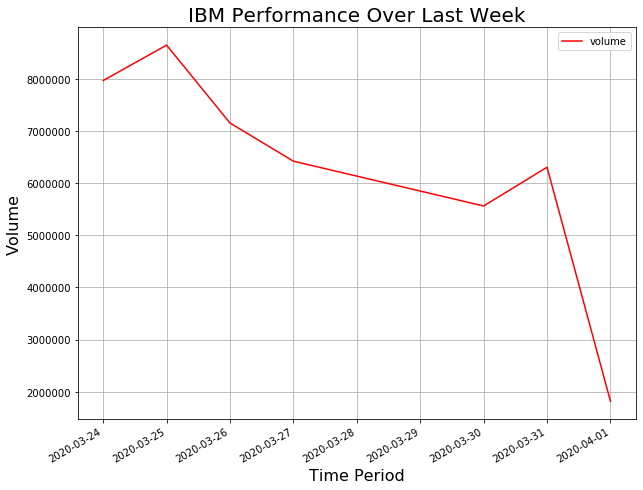

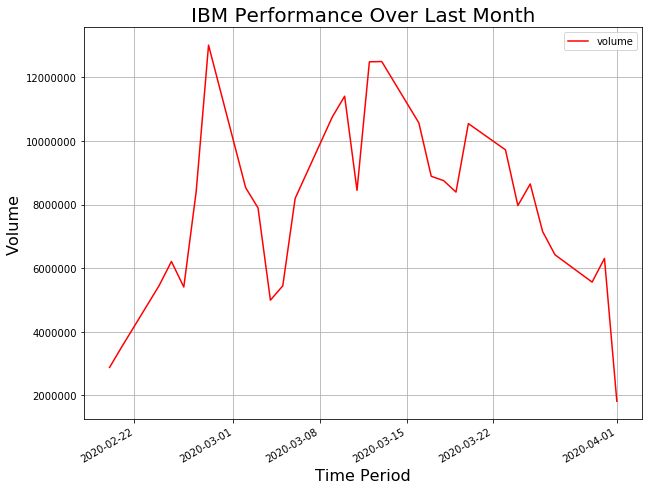

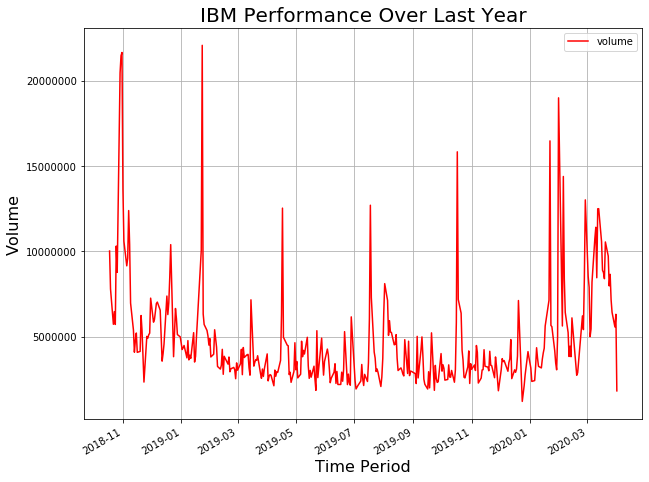

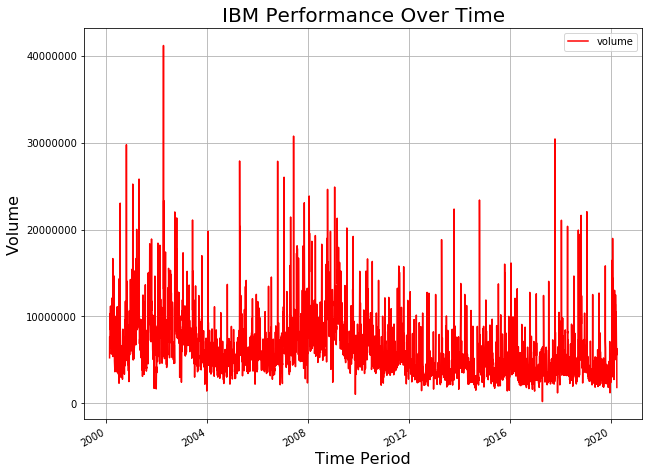

In [11]:
GetOtherCompanies('IBM_Twits.csv', days='lastWeek')
GetOtherCompanies('IBM_Twits.csv', days='lastMonth')
GetOtherCompanies('IBM_Twits.csv', days='lastYear')
GetOtherCompanies('IBM_Twits.csv')
GetVolume('IBMDaily.csv', days='lastWeek')
GetVolume('IBMDaily.csv', days='lastMonth')
GetVolume('IBMDaily.csv', days='lastYear')
GetVolume('IBMDaily.csv')

## INTC (Problem with data)

In [24]:
GetOtherCompanies('INTC_Twits.csv', days='lastWeek')
GetOtherCompanies('INTC_Twits.csv', days='lastMonth')
GetOtherCompanies('INTC_Twits.csv', days='lastYear')
GetOtherCompanies('INTC_Twits.csv')
GetVolume('INTCDaily.csv', days='lastWeek')
GetVolume('INTCDaily.csv', days='lastMonth')
GetVolume('INTCDaily.csv', days='lastYear')
GetVolume('INTCDaily.csv')

ValueError: time data '2/10/2020 19:53' does not match format '%Y-%m-%d %H:%M:%S'

## HPQ

saved HPQTopFiveOtherCompaniesLastWeek.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved HPQTopTenOtherCompaniesLastWeek.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved HPQTopFiveOtherCompaniesLastMonth.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved HPQTopTenOtherCompaniesLastMonth.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved HPQTopFiveOtherCompaniesLastYear.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved HPQTopTenOtherCompaniesLastYear.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved HPQTopFiveOtherCompaniesAllTime.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved HPQTopTenOtherCompanies

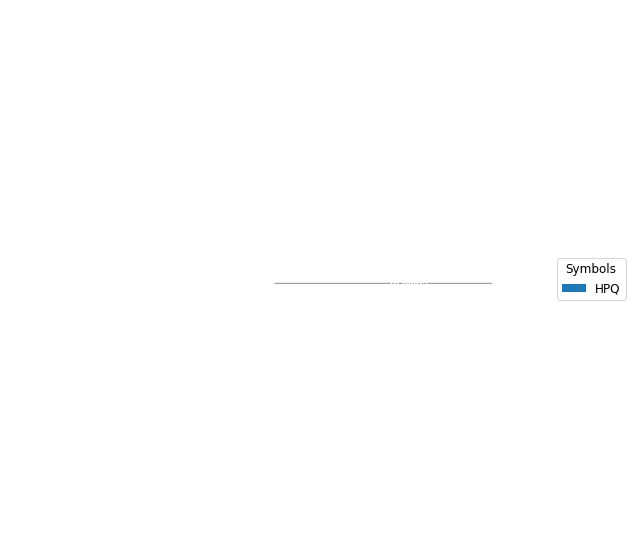

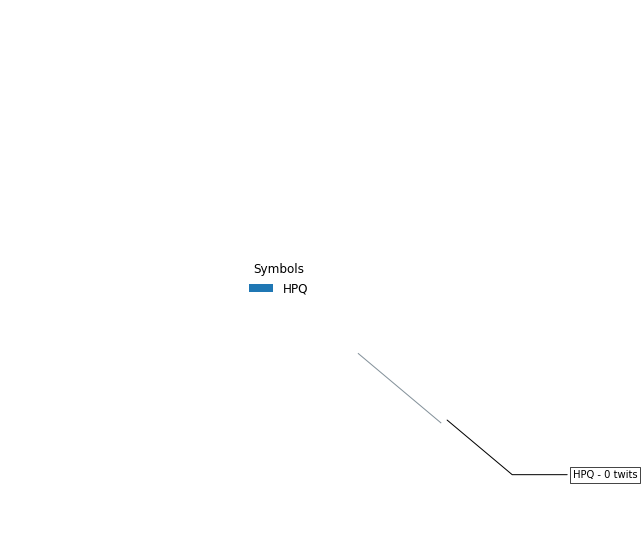

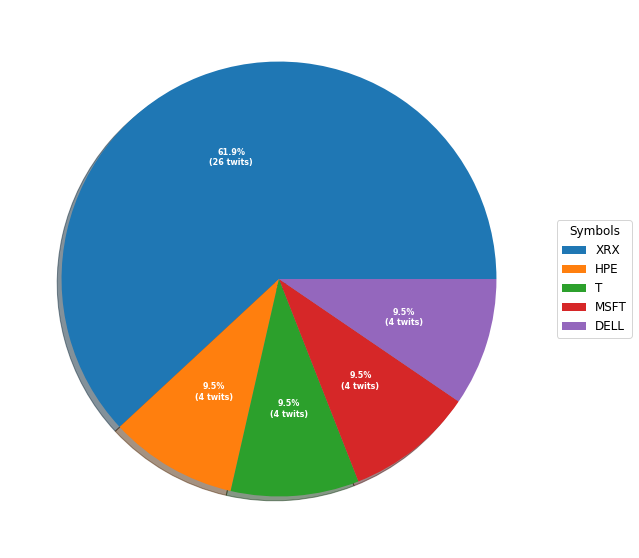

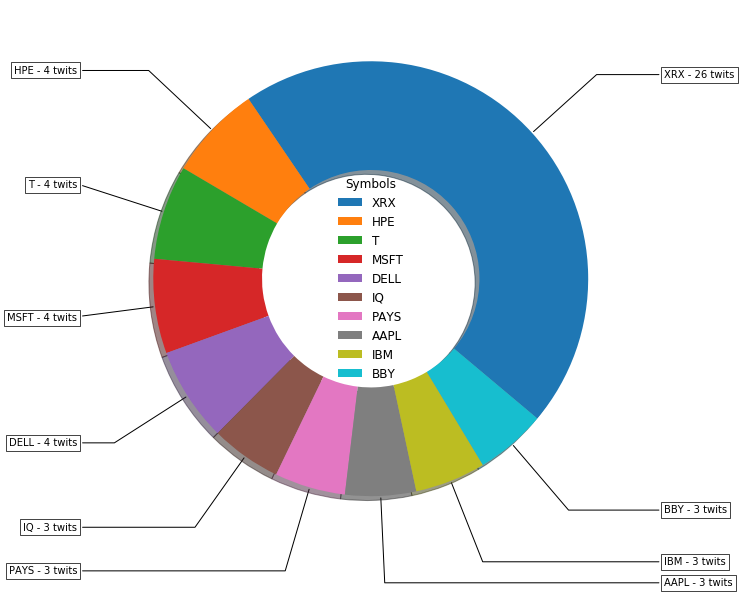

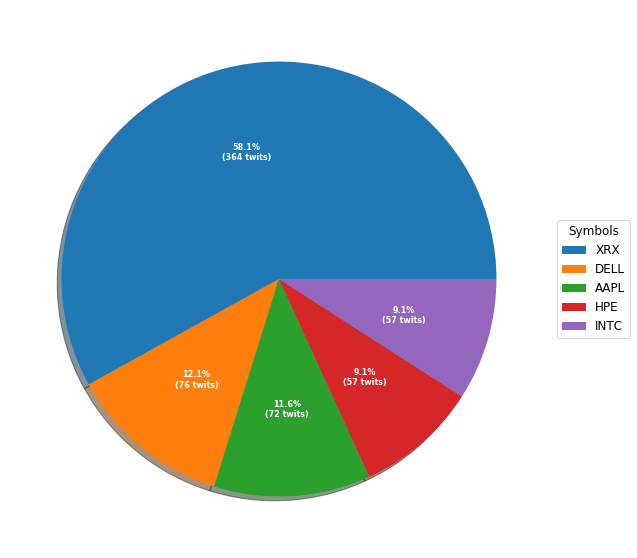

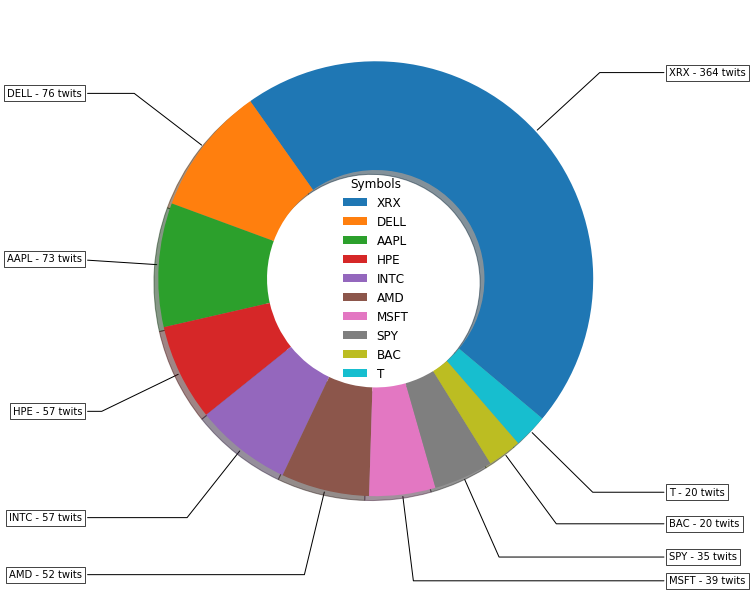

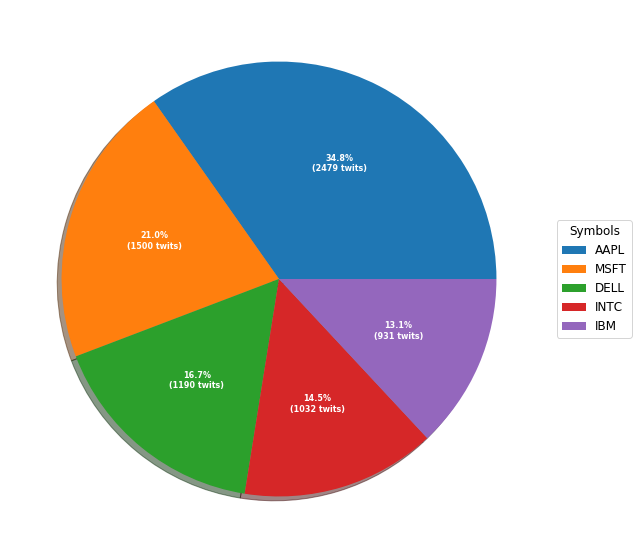

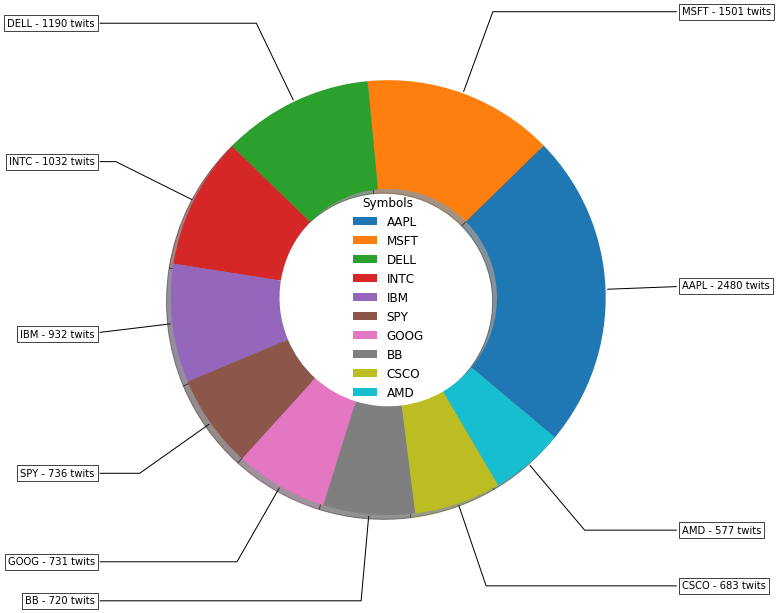

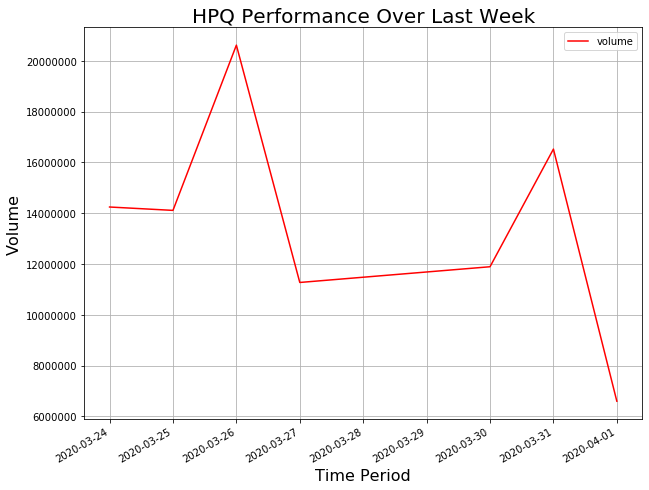

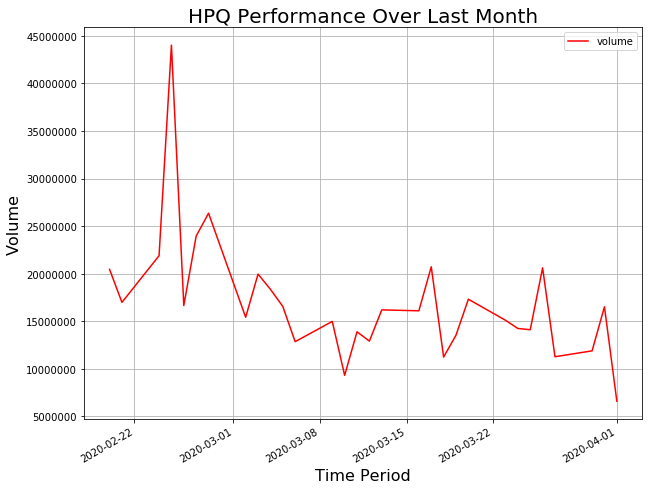

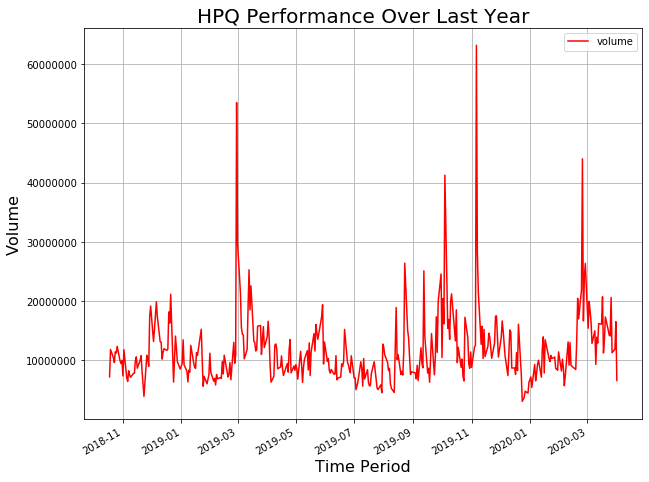

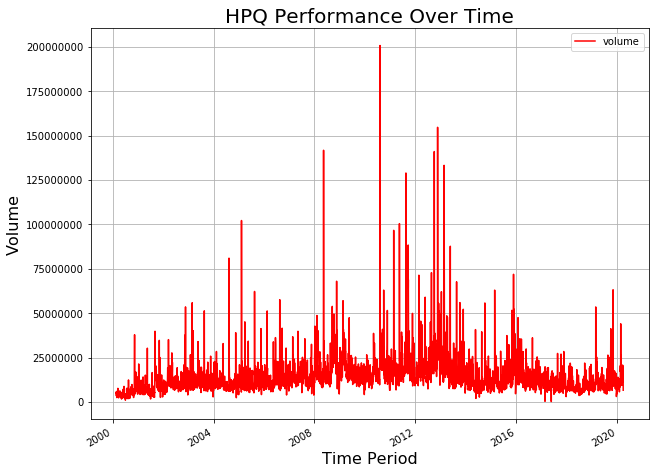

In [13]:
GetOtherCompanies('HPQ_Twits.csv', days='lastWeek')
GetOtherCompanies('HPQ_Twits.csv', days='lastMonth')
GetOtherCompanies('HPQ_Twits.csv', days='lastYear')
GetOtherCompanies('HPQ_Twits.csv')
GetVolume('HPQDaily.csv', days='lastWeek')
GetVolume('HPQDaily.csv', days='lastMonth')
GetVolume('HPQDaily.csv', days='lastYear')
GetVolume('HPQDaily.csv')

## FB

saved FBTopFiveOtherCompaniesLastWeek.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved FBTopTenOtherCompaniesLastWeek.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved FBTopFiveOtherCompaniesLastMonth.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved FBTopTenOtherCompaniesLastMonth.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved FBTopFiveOtherCompaniesLastYear.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved FBTopTenOtherCompaniesLastYear.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved FBTopFiveOtherCompaniesAllTime.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved FBTopTenOtherCompaniesAllTime.

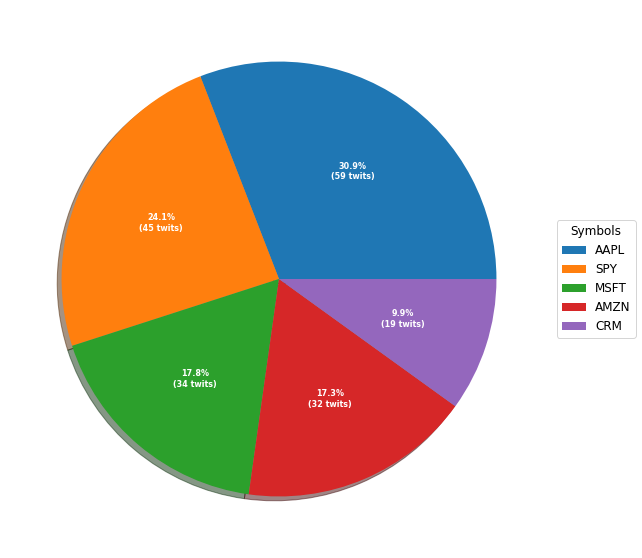

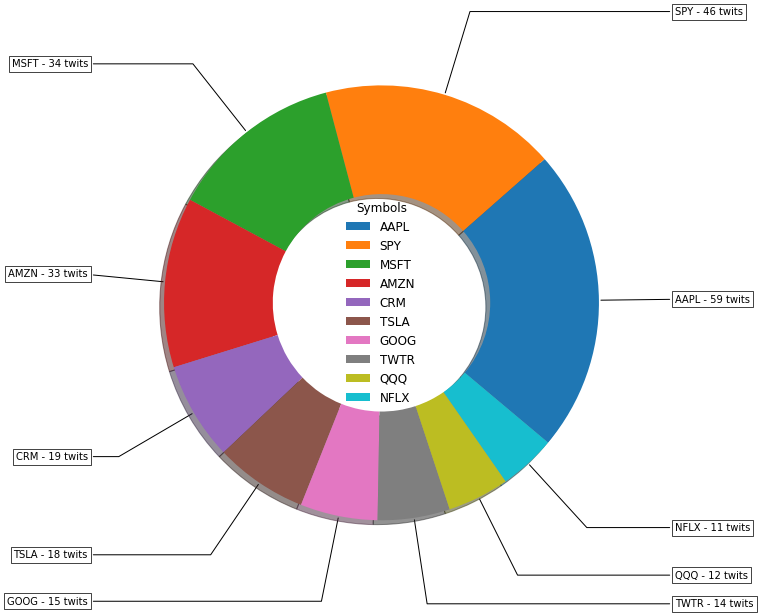

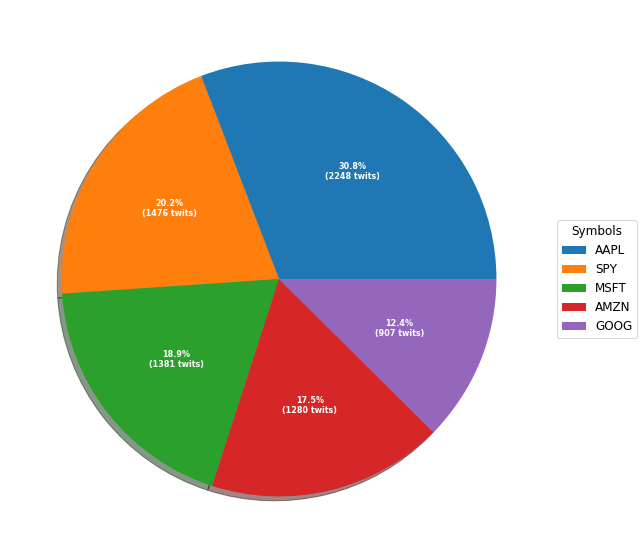

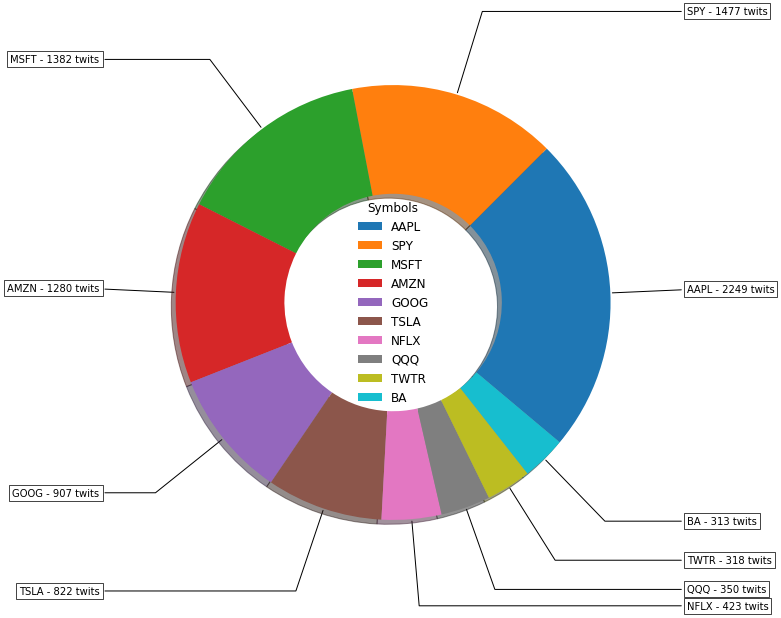

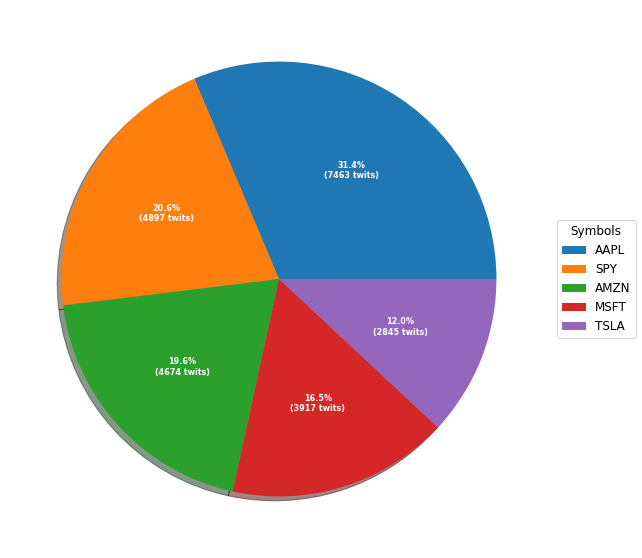

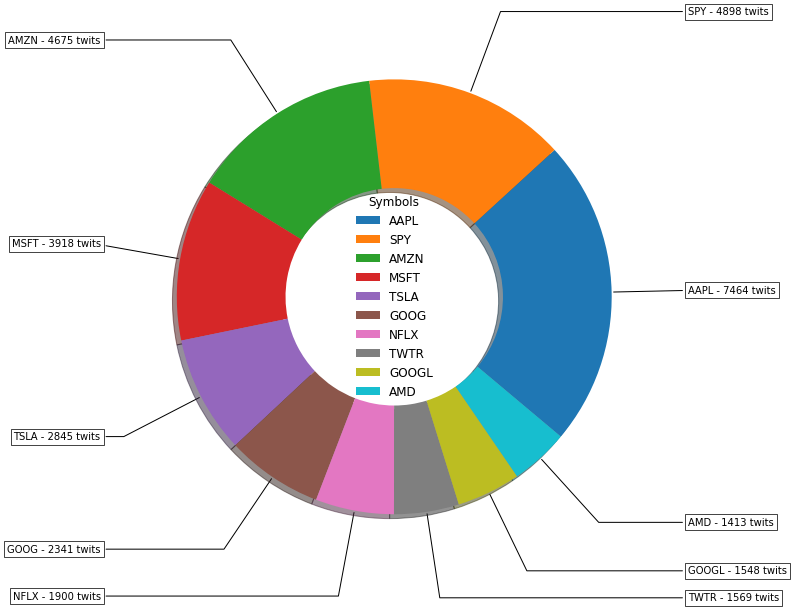

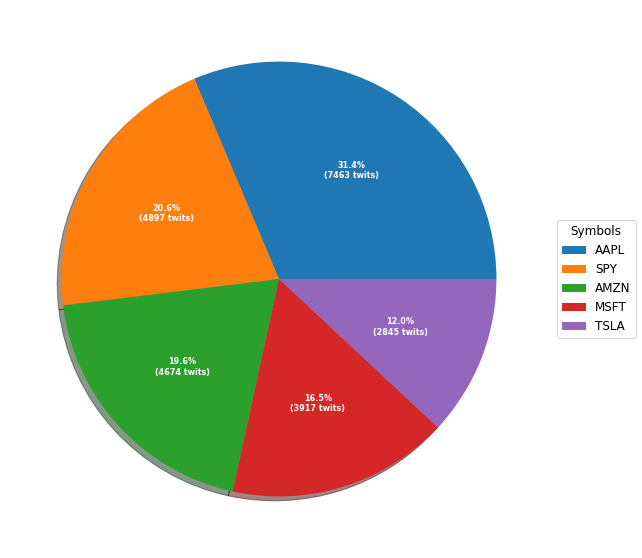

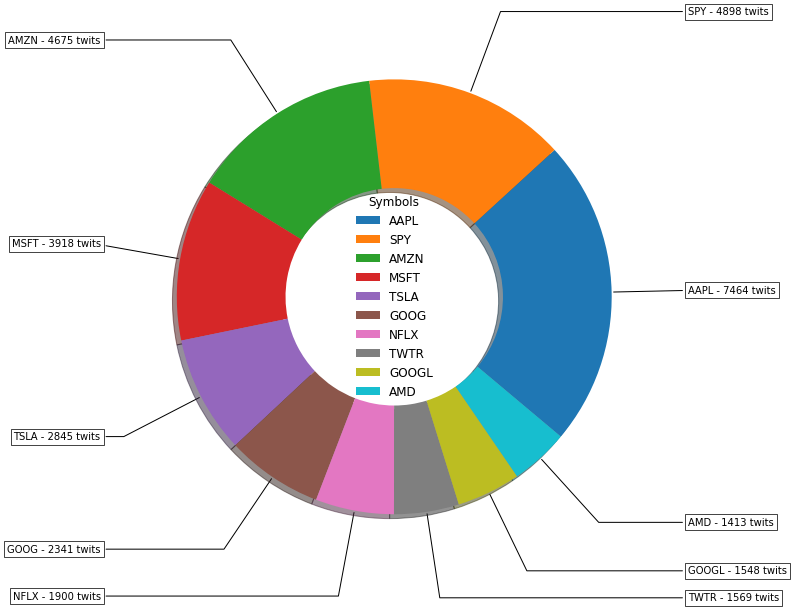

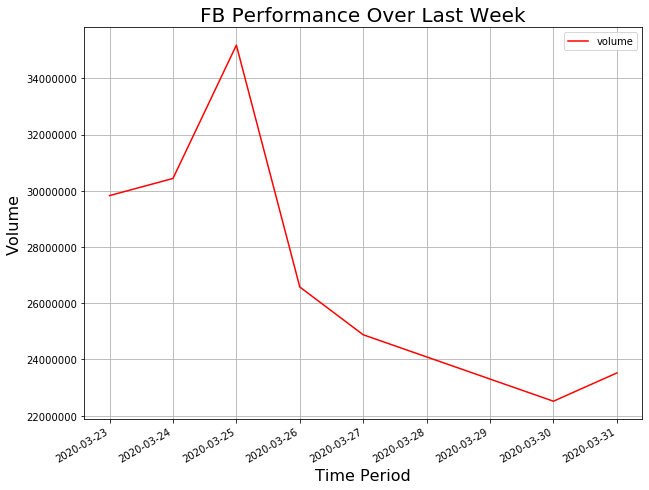

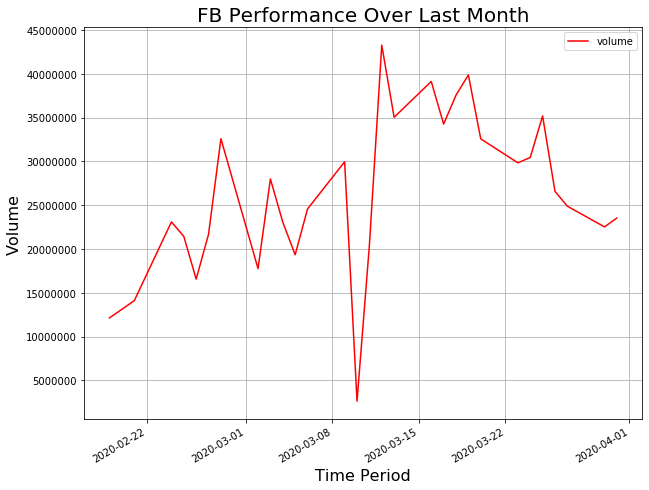

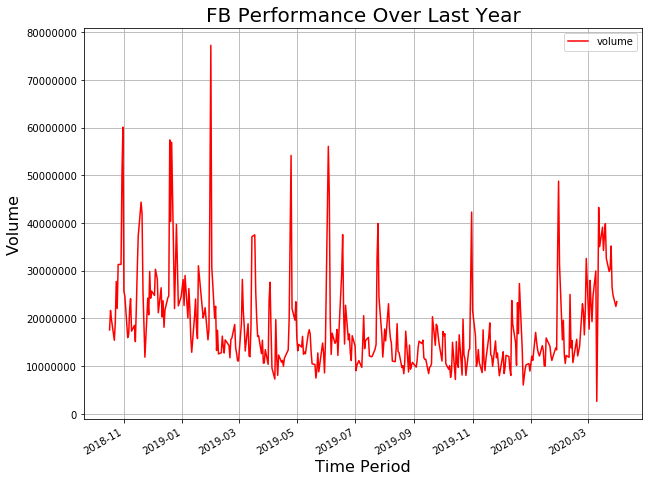

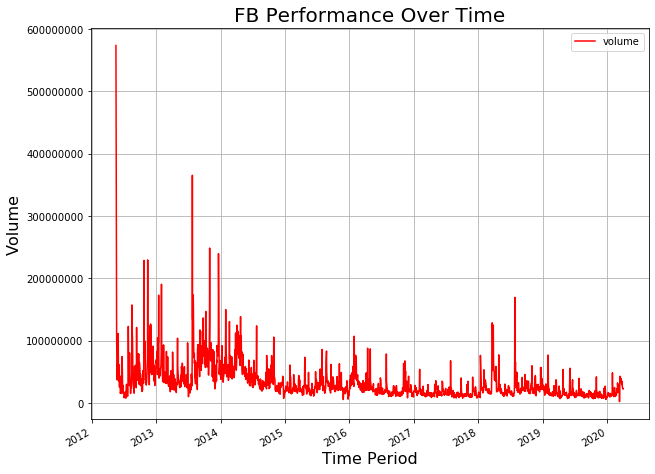

In [14]:
GetOtherCompanies('FB_Twits.csv', days='lastWeek')
GetOtherCompanies('FB_Twits.csv', days='lastMonth')
GetOtherCompanies('FB_Twits.csv', days='lastYear')
GetOtherCompanies('FB_Twits.csv')
GetVolume('FBDaily.csv', days='lastWeek')
GetVolume('FBDaily.csv', days='lastMonth')
GetVolume('FBDaily.csv', days='lastYear')
GetVolume('FBDaily.csv')

## CSCO

saved CSCOTopFiveOtherCompaniesLastWeek.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved CSCOTopTenOtherCompaniesLastWeek.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved CSCOTopFiveOtherCompaniesLastMonth.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved CSCOTopTenOtherCompaniesLastMonth.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved CSCOTopFiveOtherCompaniesLastYear.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved CSCOTopTenOtherCompaniesLastYear.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved CSCOTopFiveOtherCompaniesAllTime.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved CSCOTopTenOtherC

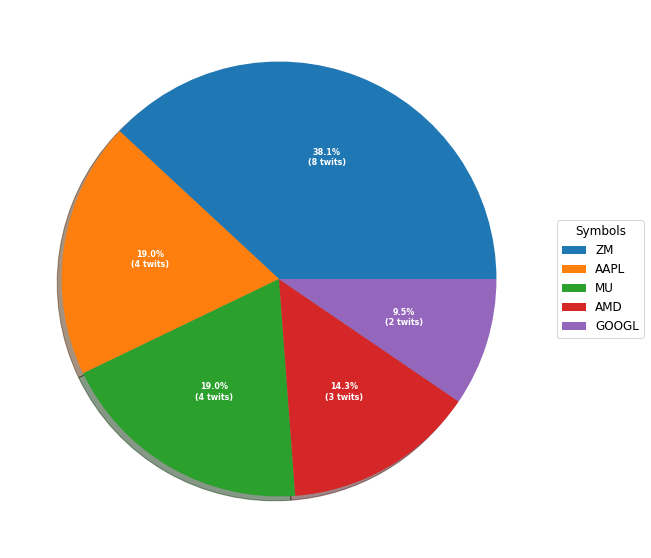

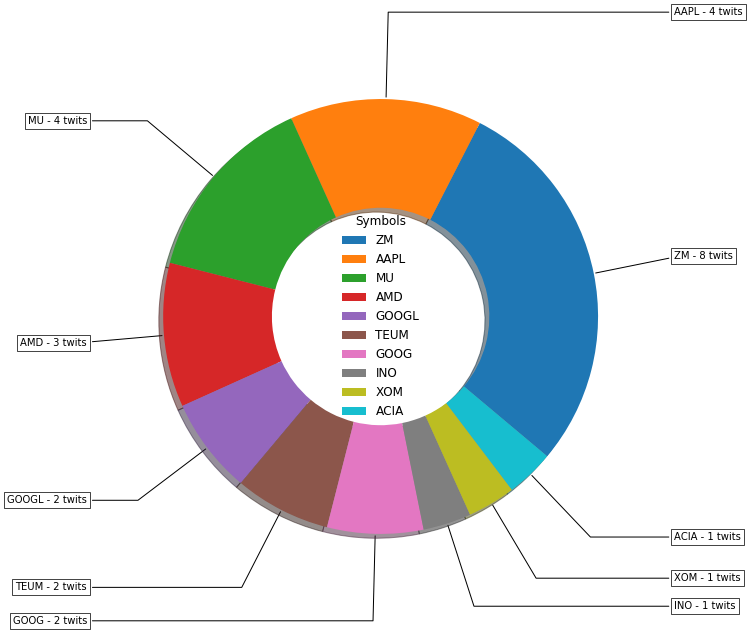

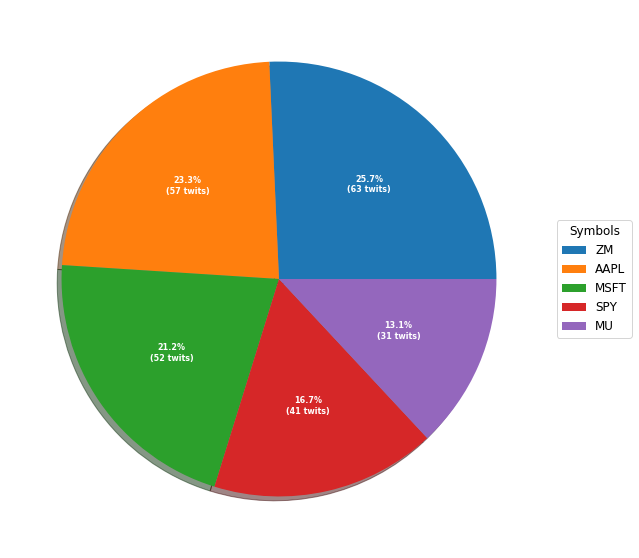

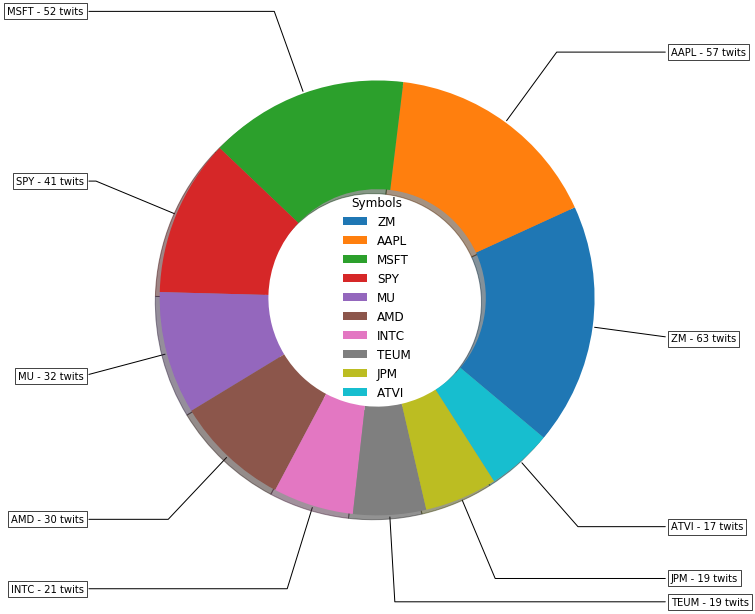

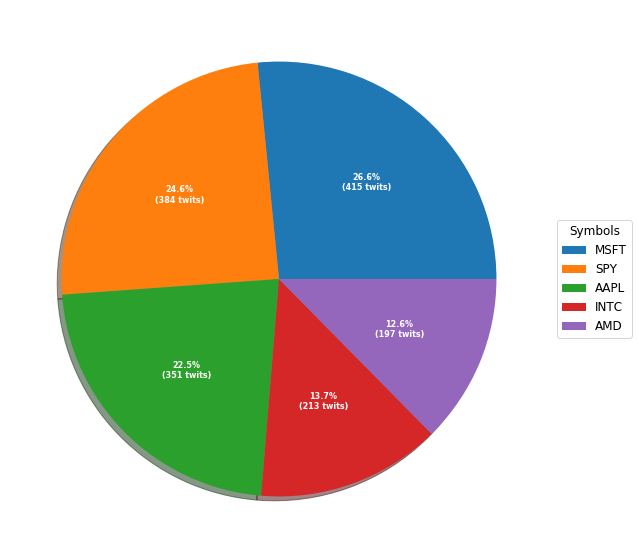

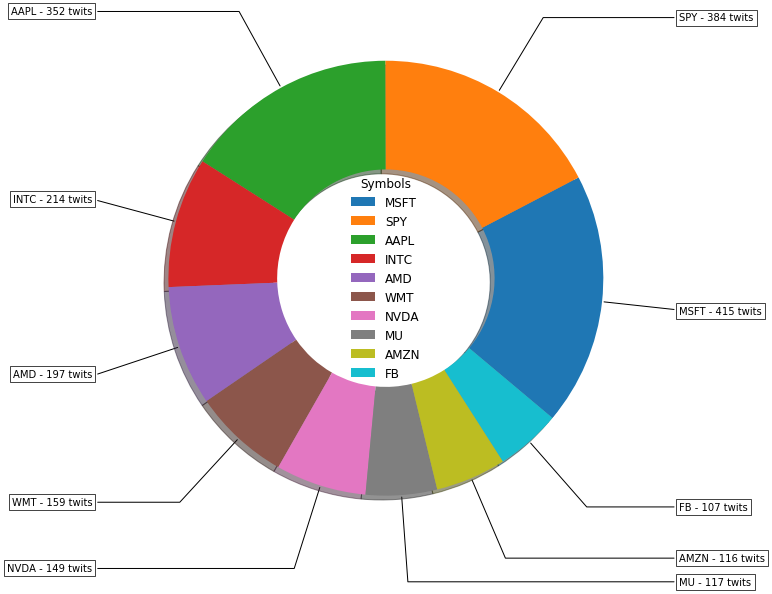

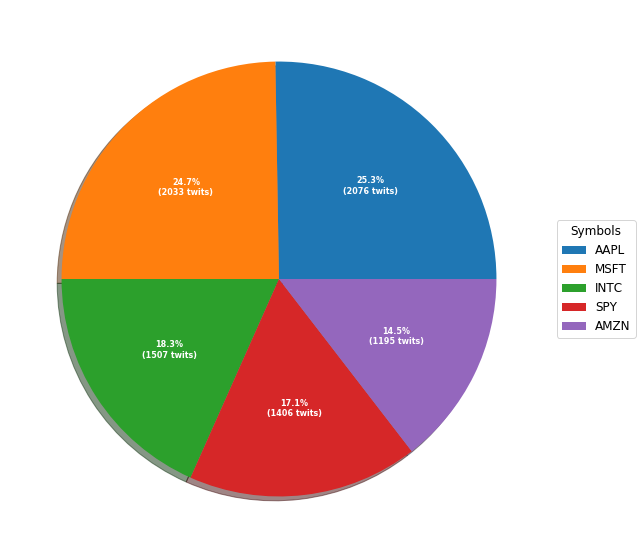

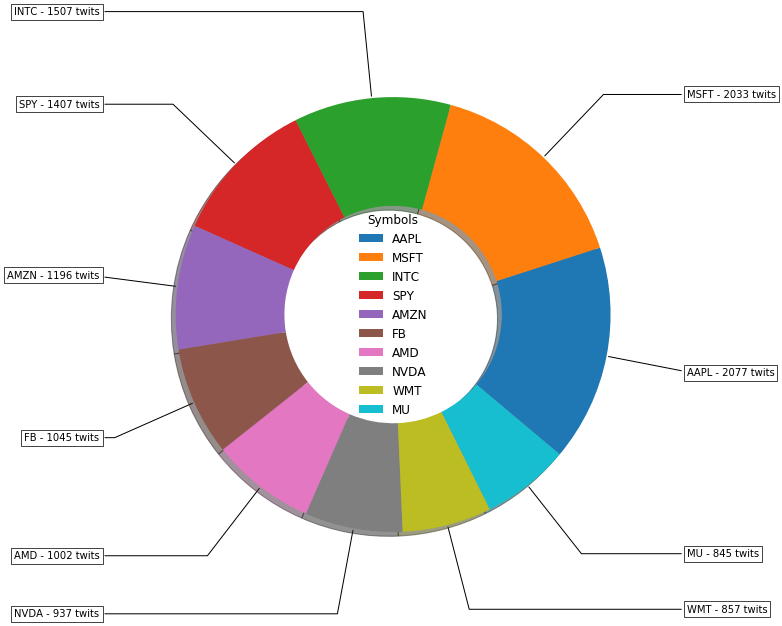

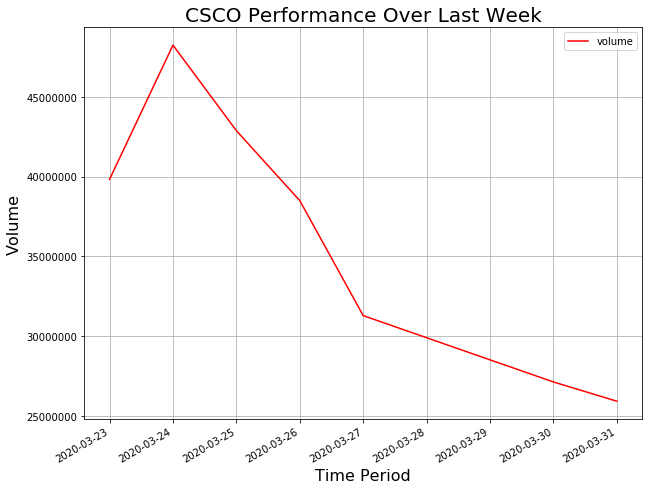

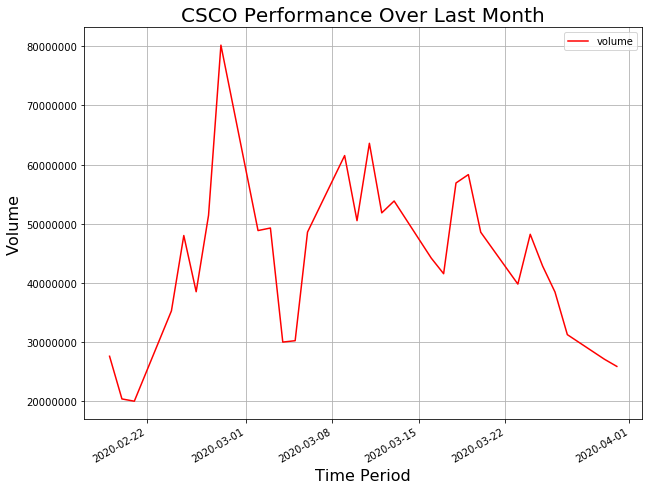

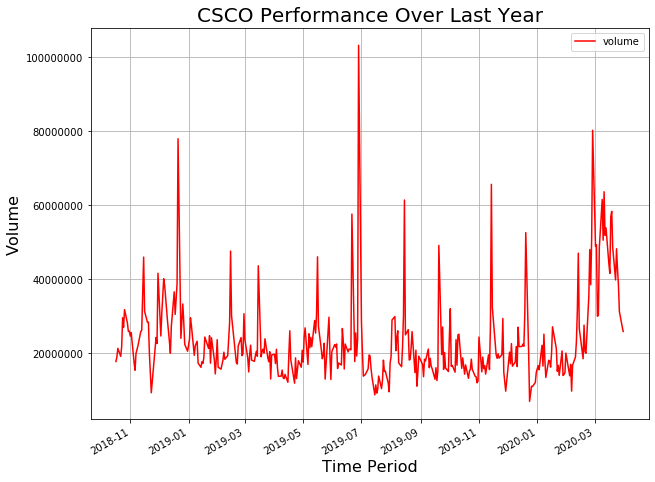

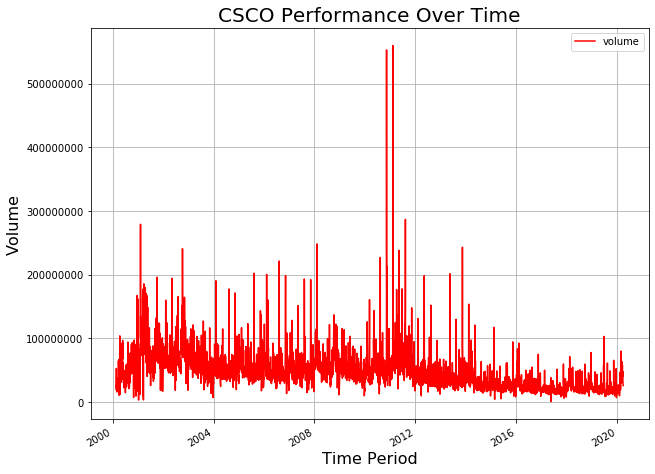

In [15]:
GetOtherCompanies('CSCO_Twits.csv', days='lastWeek')
GetOtherCompanies('CSCO_Twits.csv', days='lastMonth')
GetOtherCompanies('CSCO_Twits.csv', days='lastYear')
GetOtherCompanies('CSCO_Twits.csv')
GetVolume('CSCODaily.csv', days='lastWeek')
GetVolume('CSCODaily.csv', days='lastMonth')
GetVolume('CSCODaily.csv', days='lastYear')
GetVolume('CSCODaily.csv')

## ORCL

saved ORCLTopFiveOtherCompaniesLastWeek.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved ORCLTopTenOtherCompaniesLastWeek.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved ORCLTopFiveOtherCompaniesLastMonth.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved ORCLTopTenOtherCompaniesLastMonth.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved ORCLTopFiveOtherCompaniesLastYear.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved ORCLTopTenOtherCompaniesLastYear.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved ORCLTopFiveOtherCompaniesAllTime.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved ORCLTopTenOtherC

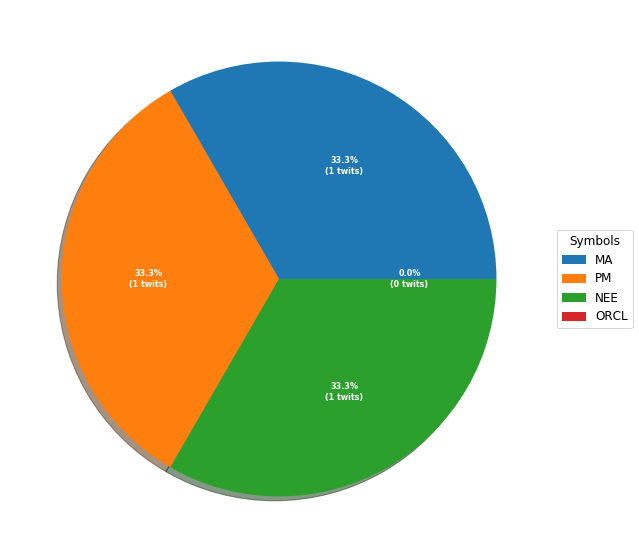

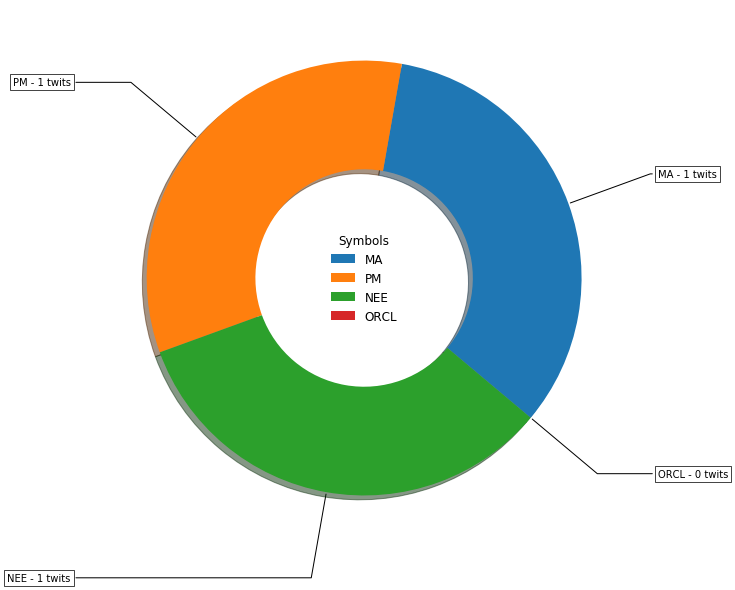

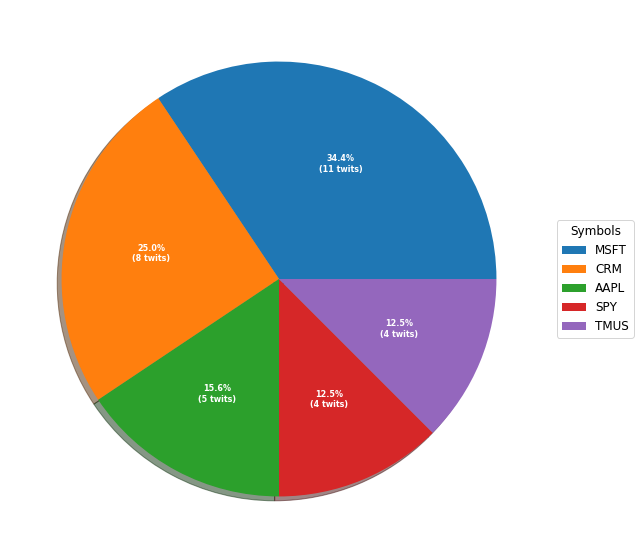

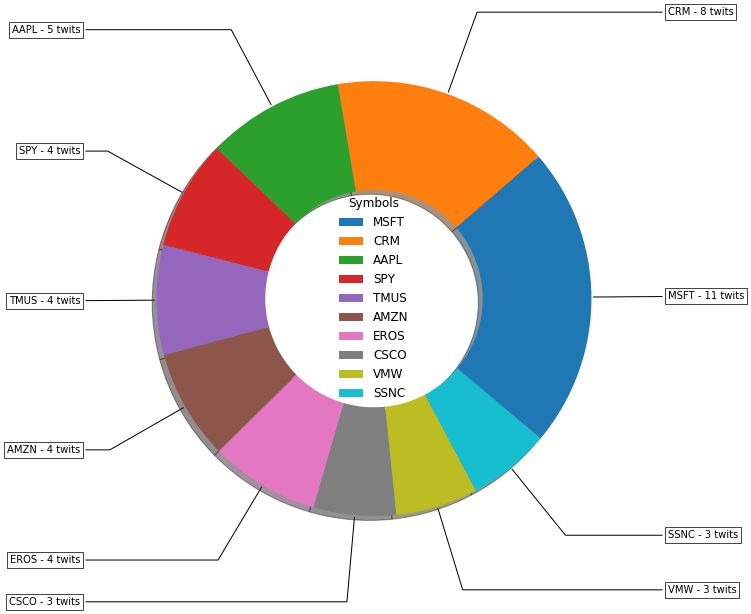

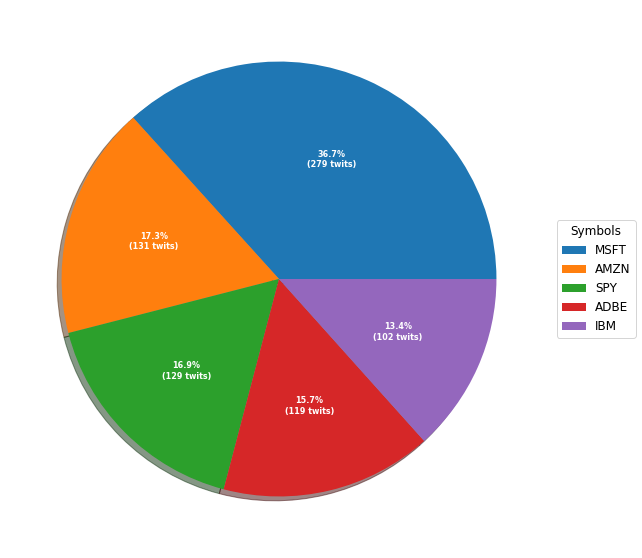

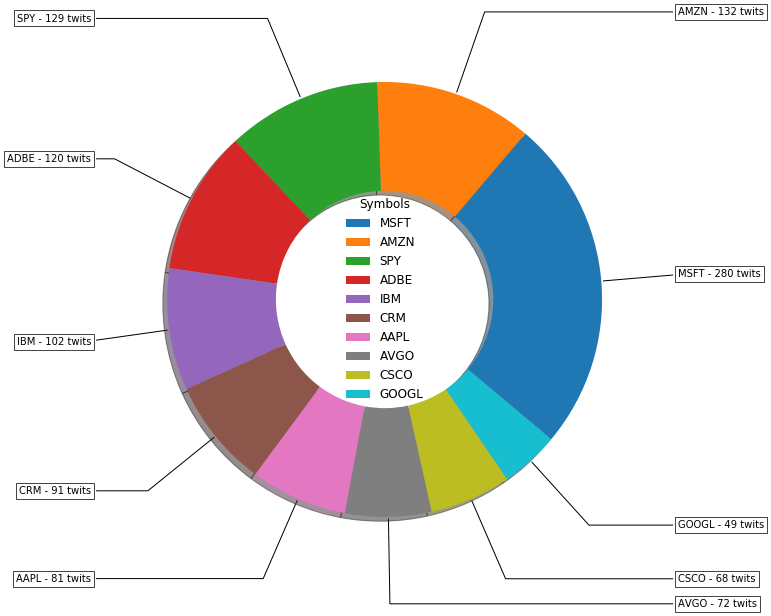

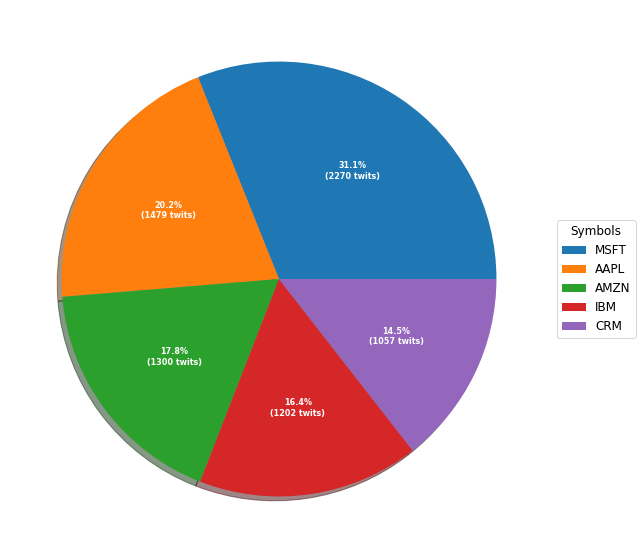

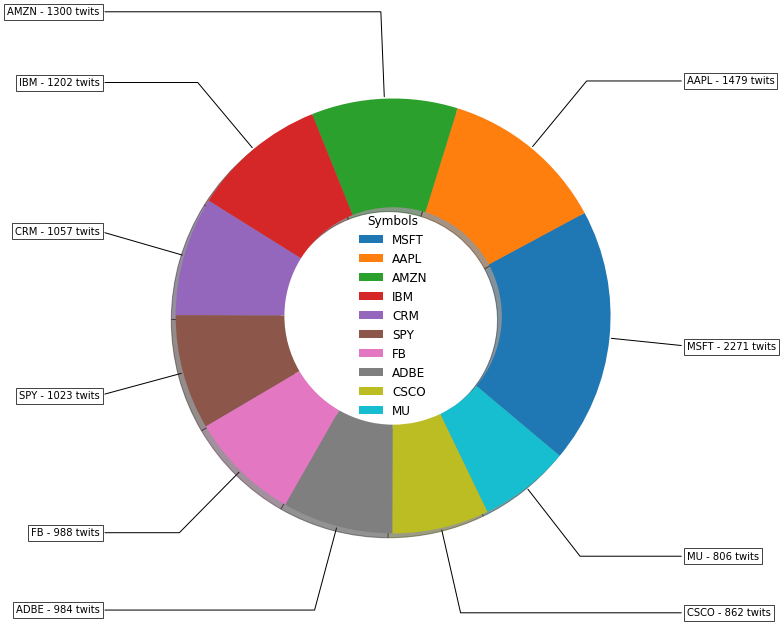

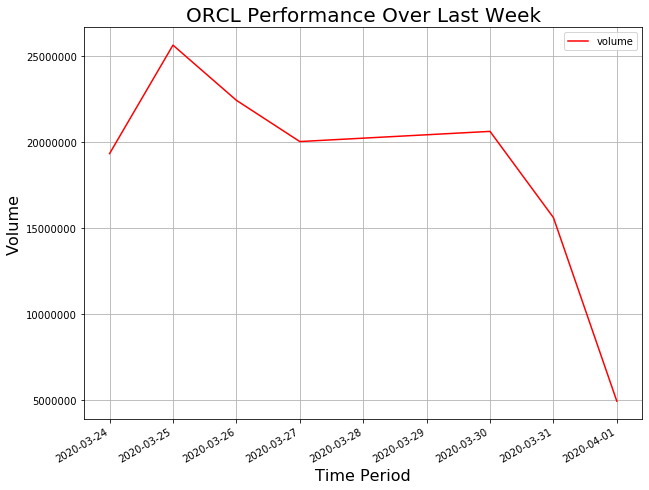

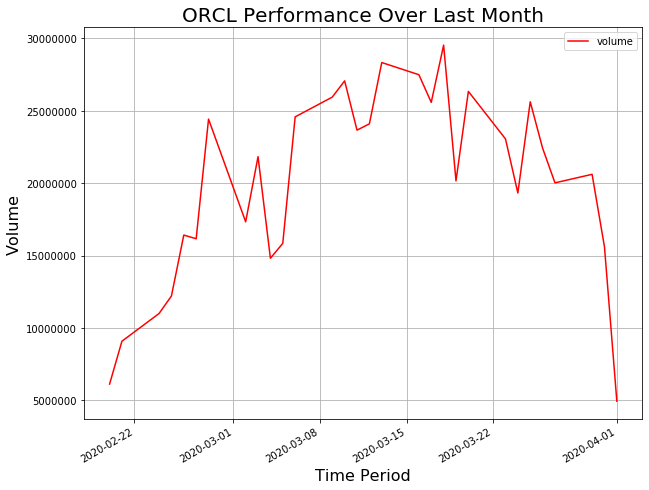

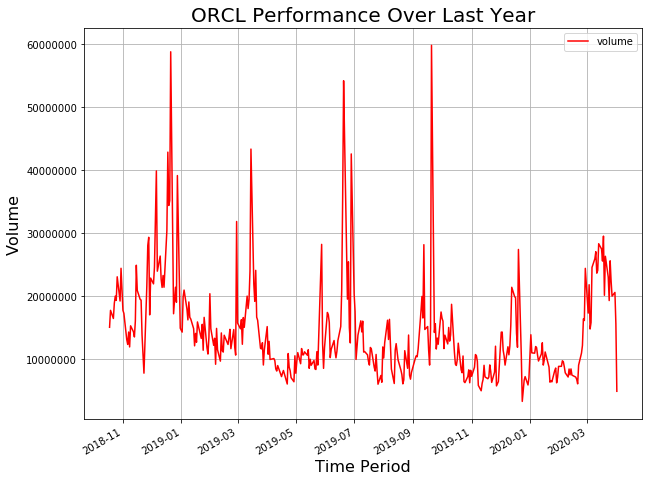

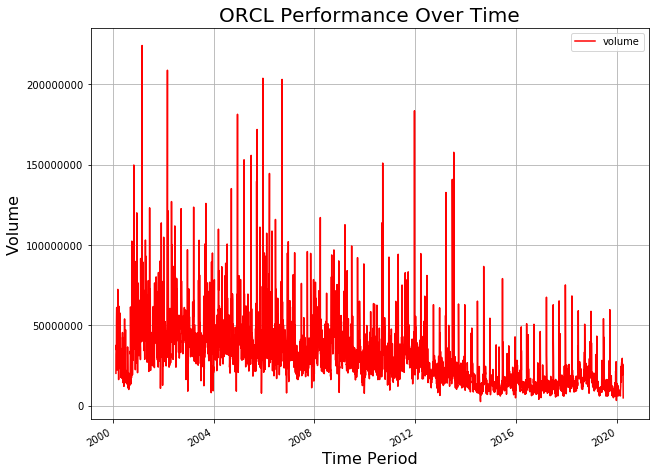

In [16]:
GetOtherCompanies('ORCL_Twits.csv', days='lastWeek')
GetOtherCompanies('ORCL_Twits.csv', days='lastMonth')
GetOtherCompanies('ORCL_Twits.csv', days='lastYear')
GetOtherCompanies('ORCL_Twits.csv')
GetVolume('ORCLDaily.csv', days='lastWeek')
GetVolume('ORCLDaily.csv', days='lastMonth')
GetVolume('ORCLDaily.csv', days='lastYear')
GetVolume('ORCLDaily.csv')

## HPE

saved HPETopFiveOtherCompaniesLastWeek.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved HPETopTenOtherCompaniesLastWeek.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved HPETopFiveOtherCompaniesLastMonth.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved HPETopTenOtherCompaniesLastMonth.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved HPETopFiveOtherCompaniesLastYear.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved HPETopTenOtherCompaniesLastYear.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved HPETopFiveOtherCompaniesAllTime.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved HPETopTenOtherCompanies

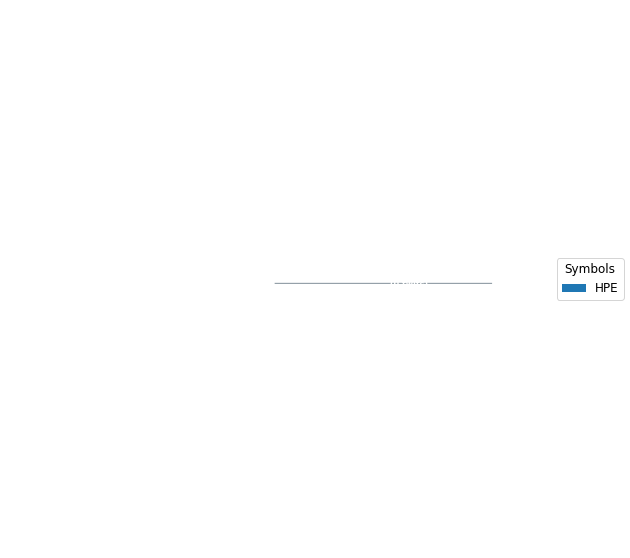

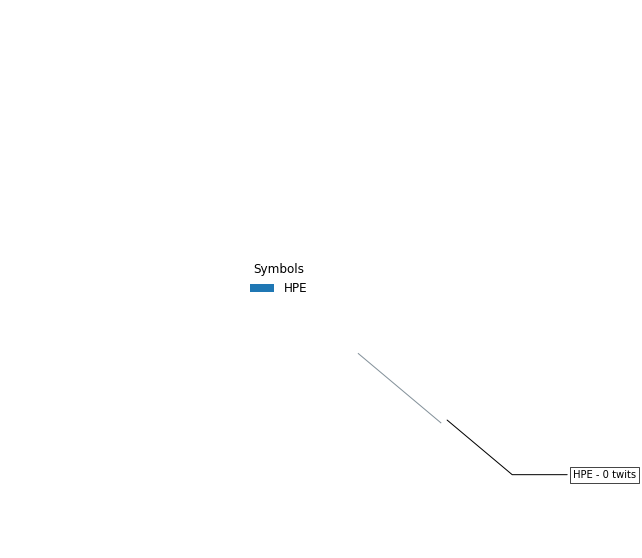

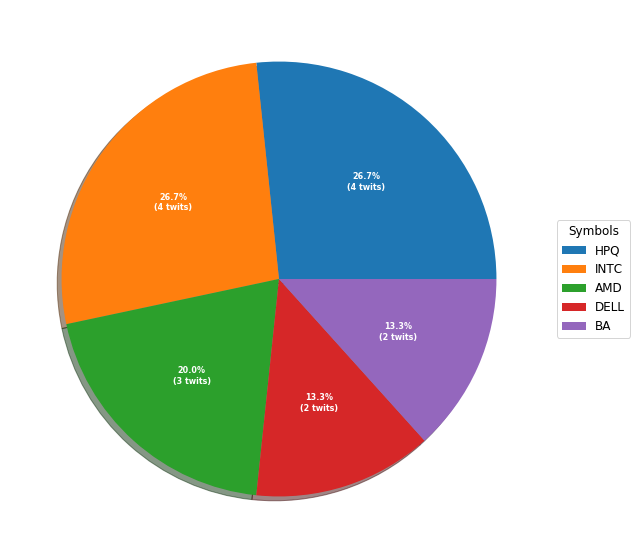

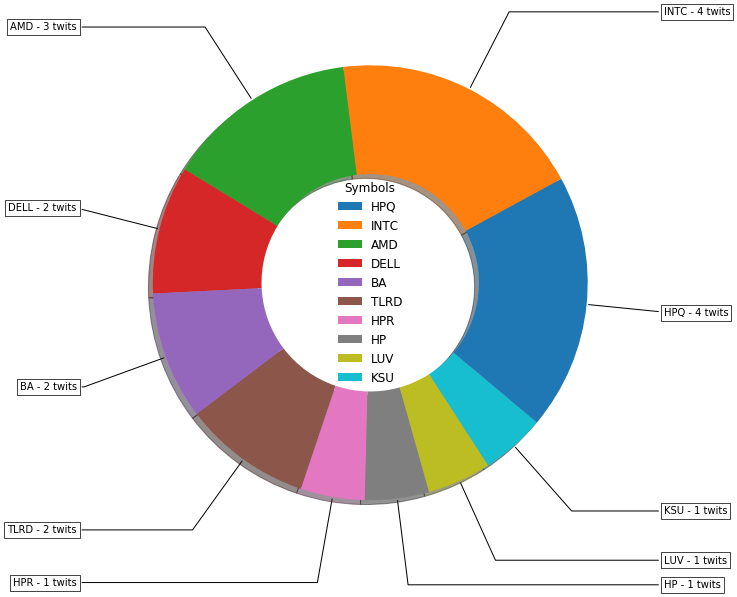

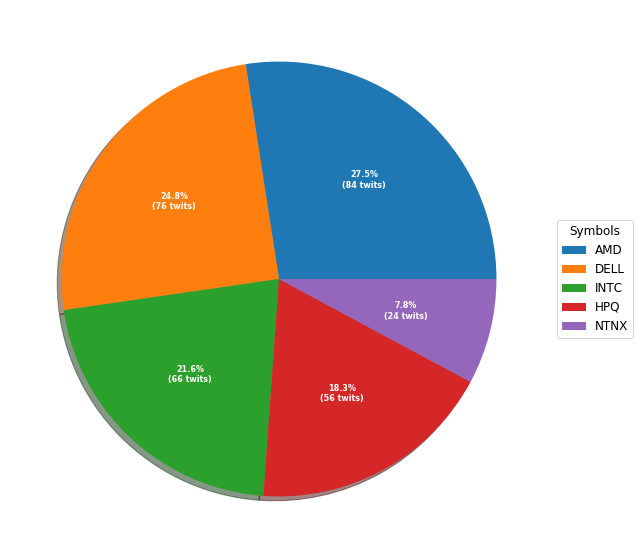

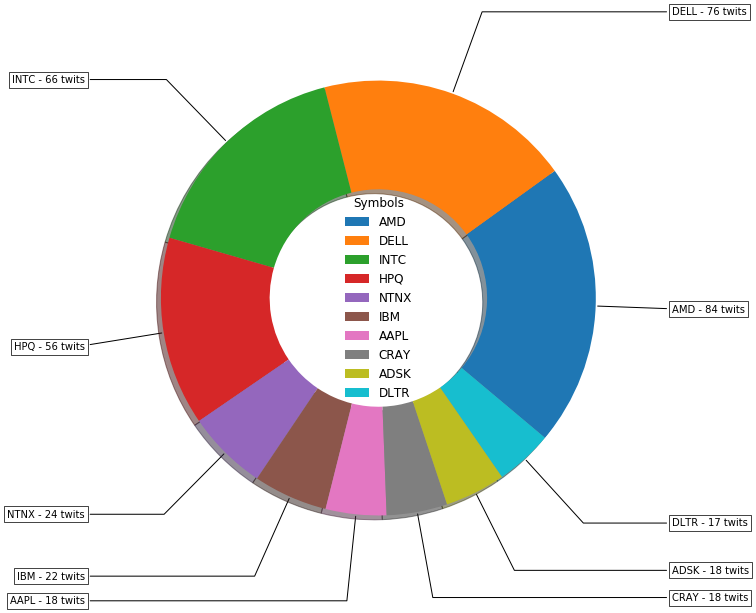

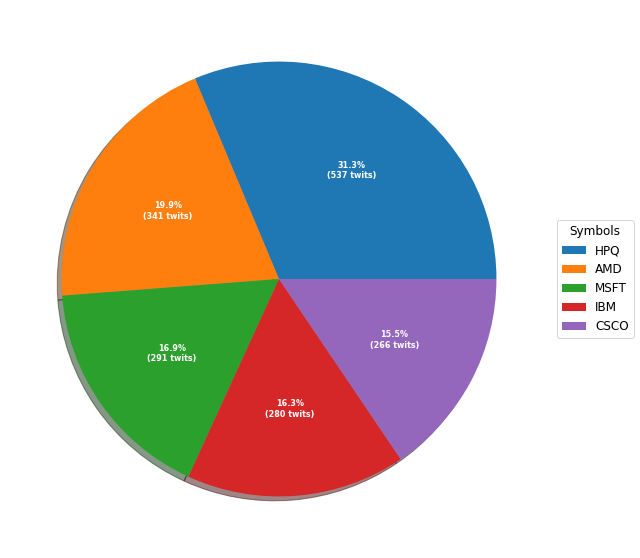

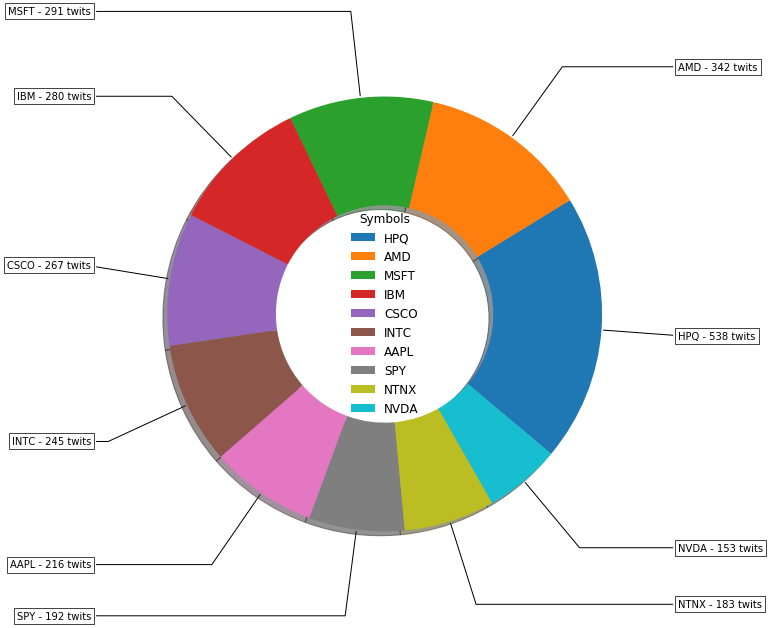

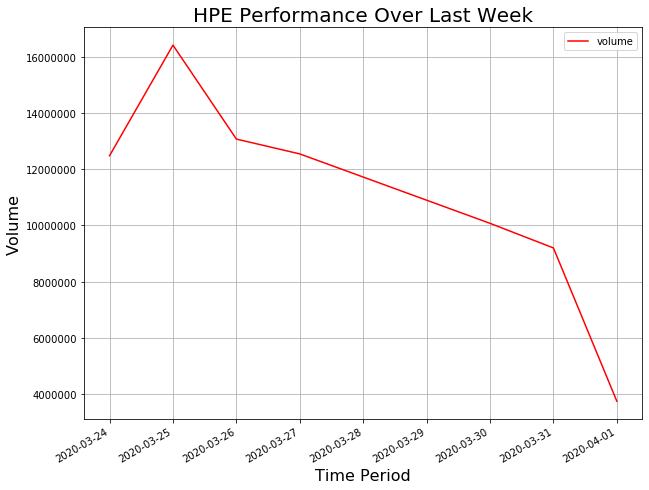

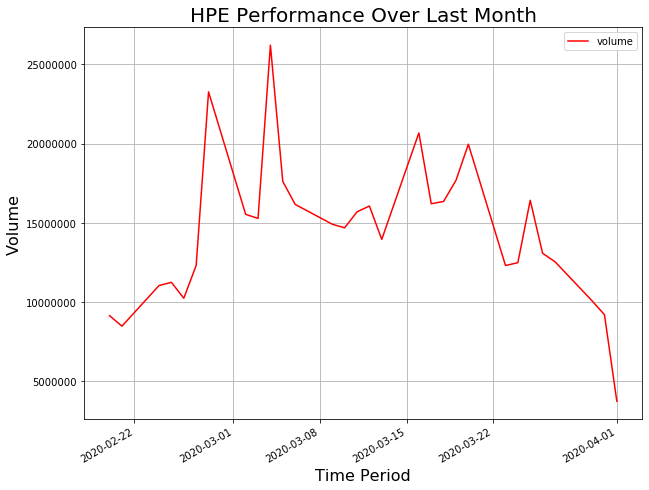

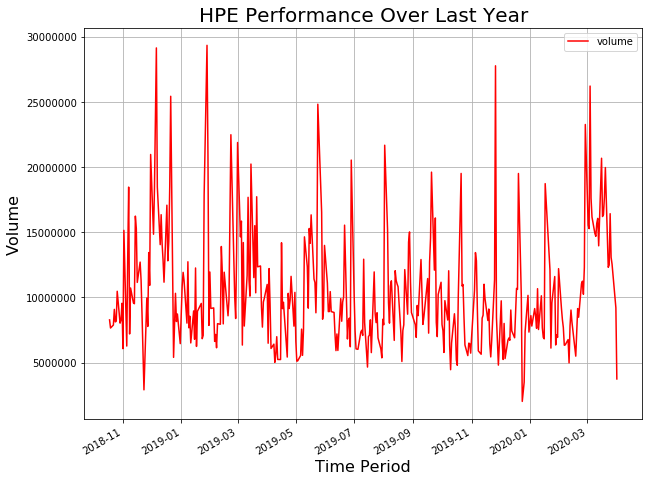

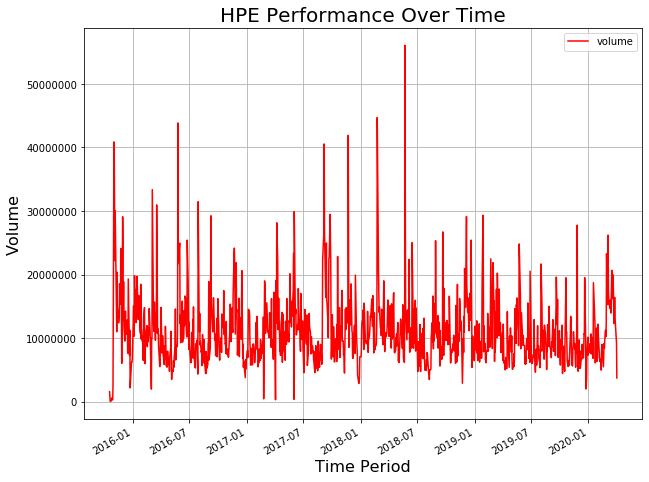

In [17]:
GetOtherCompanies('HPE_Twits.csv', days='lastWeek')
GetOtherCompanies('HPE_Twits.csv', days='lastMonth')
GetOtherCompanies('HPE_Twits.csv', days='lastYear')
GetOtherCompanies('HPE_Twits.csv')
GetVolume('HPEDaily.csv', days='lastWeek')
GetVolume('HPEDaily.csv', days='lastMonth')
GetVolume('HPEDaily.csv', days='lastYear')
GetVolume('HPEDaily.csv')

## MU

saved MUTopFiveOtherCompaniesLastWeek.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved MUTopTenOtherCompaniesLastWeek.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved MUTopFiveOtherCompaniesLastMonth.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved MUTopTenOtherCompaniesLastMonth.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved MUTopFiveOtherCompaniesLastYear.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved MUTopTenOtherCompaniesLastYear.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved MUTopFiveOtherCompaniesAllTime.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved MUTopTenOtherCompaniesAllTime.

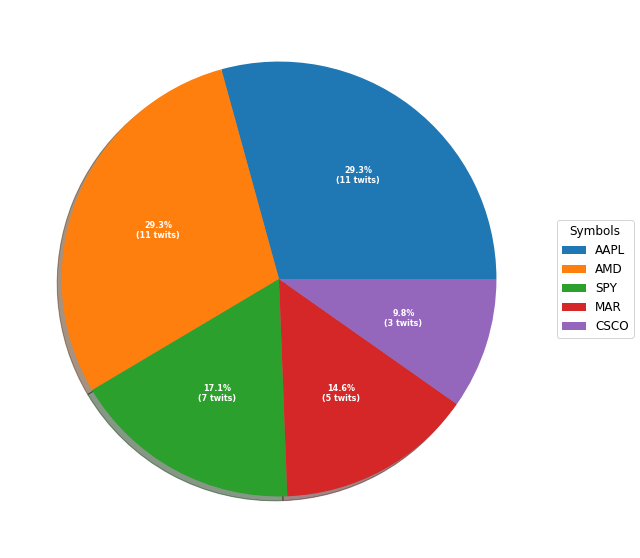

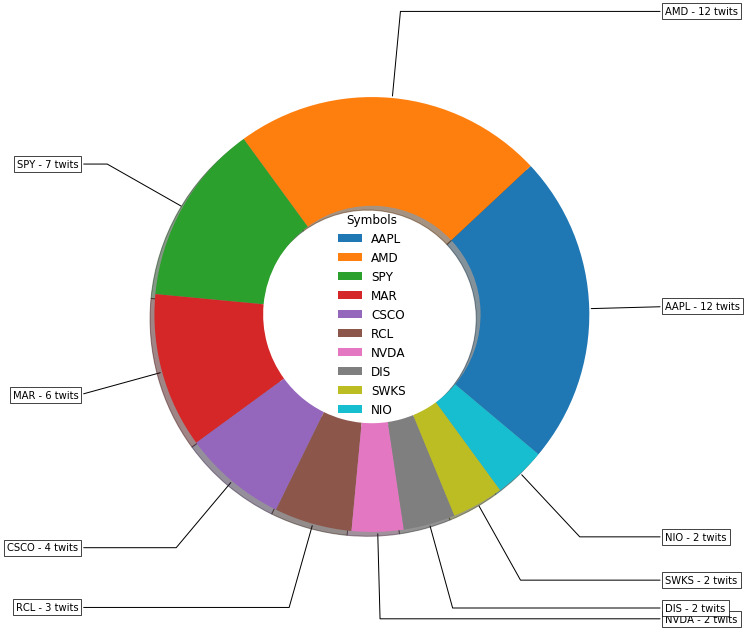

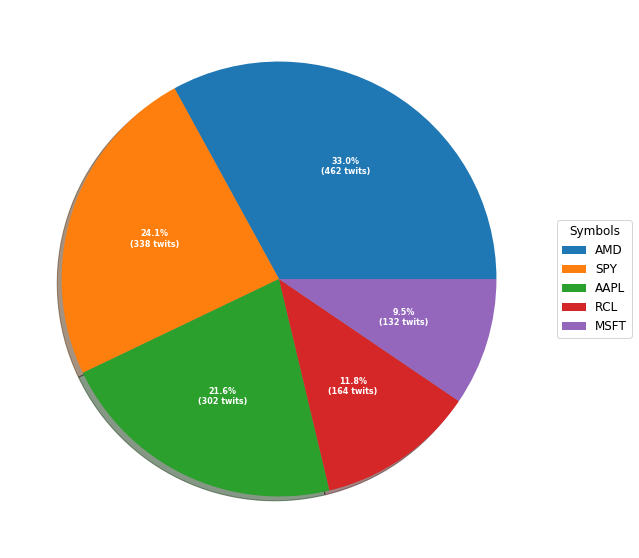

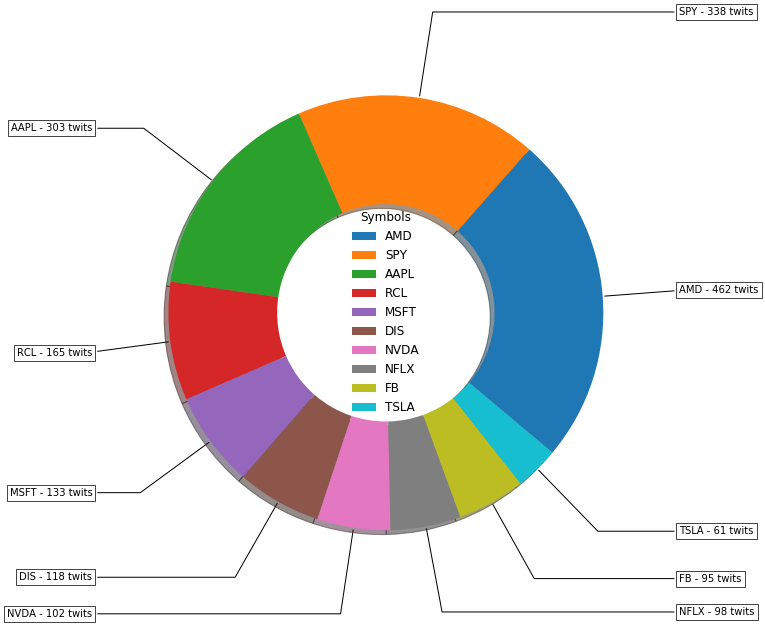

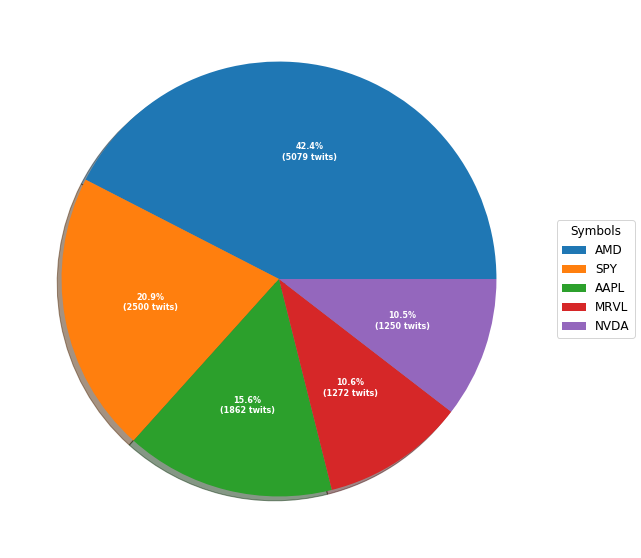

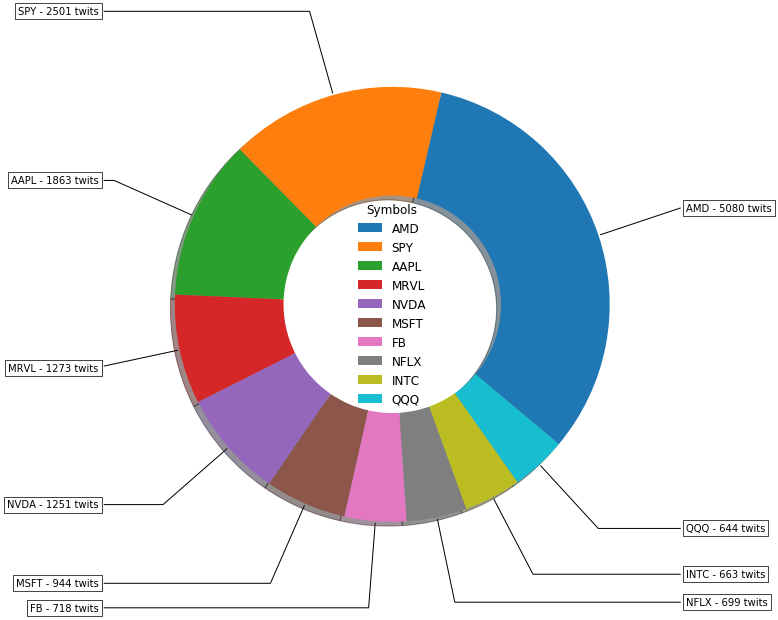

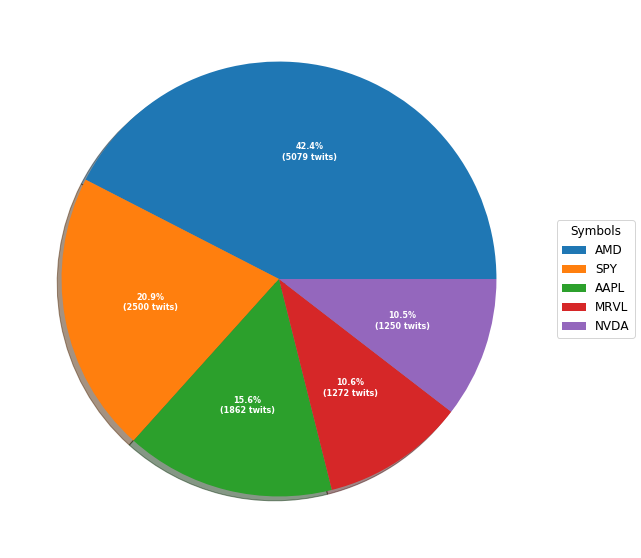

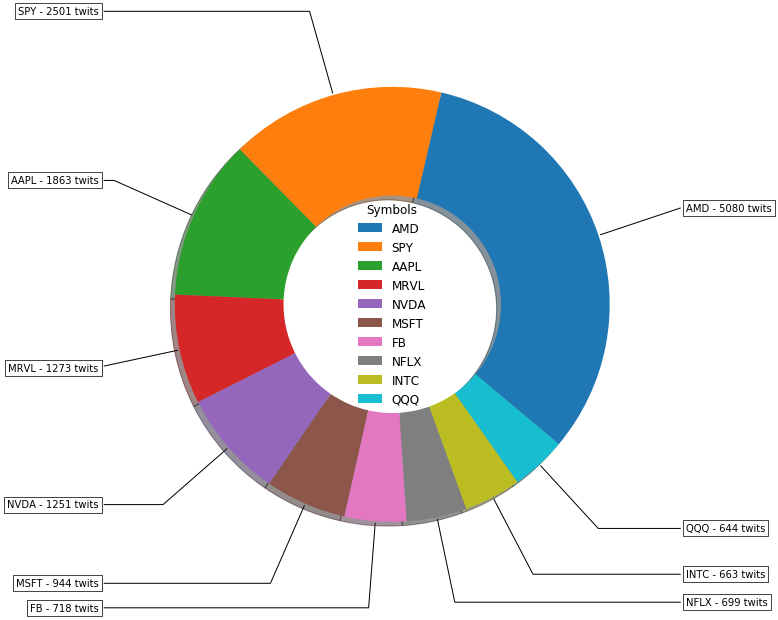

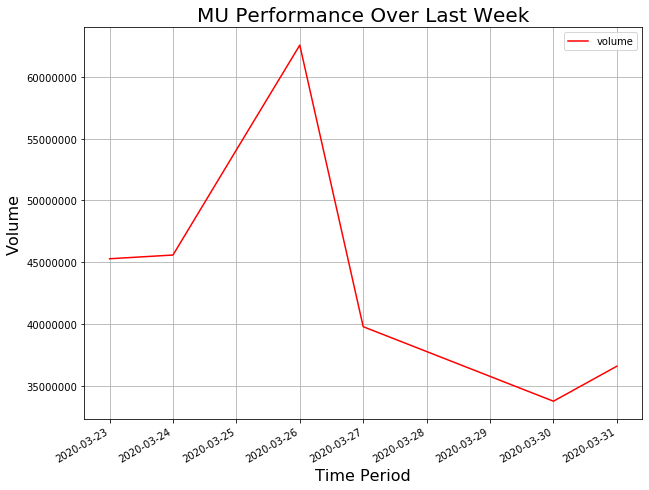

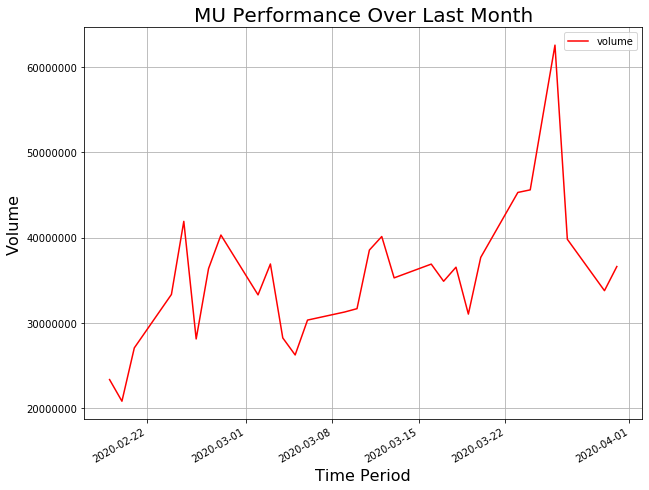

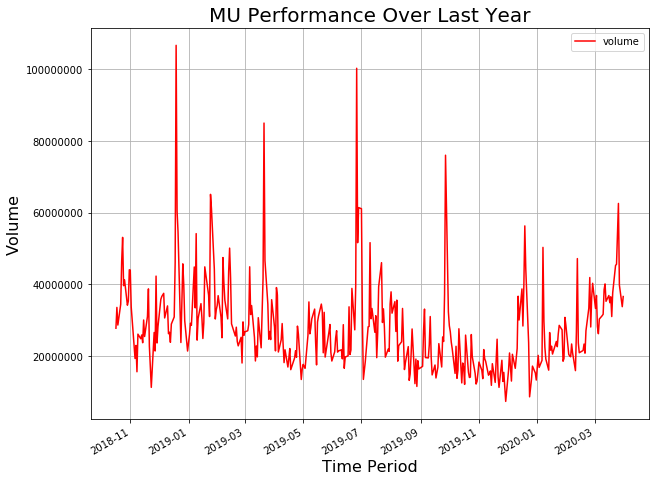

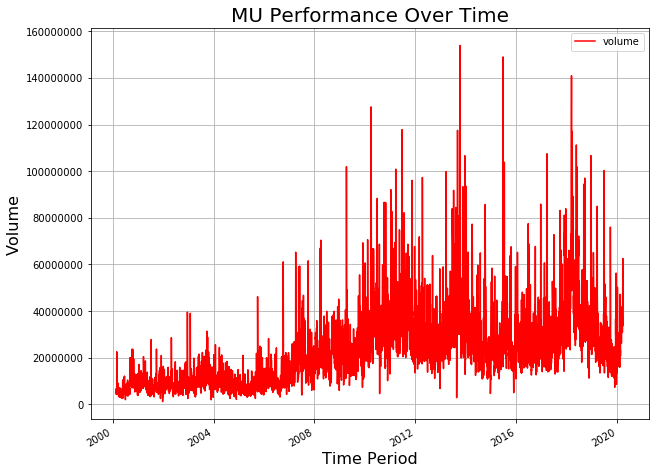

In [18]:
GetOtherCompanies('MU_Twits.csv', days='lastWeek')
GetOtherCompanies('MU_Twits.csv', days='lastMonth')
GetOtherCompanies('MU_Twits.csv', days='lastYear')
GetOtherCompanies('MU_Twits.csv')
GetVolume('MUDaily.csv', days='lastWeek')
GetVolume('MUDaily.csv', days='lastMonth')
GetVolume('MUDaily.csv', days='lastYear')
GetVolume('MUDaily.csv')

## DXC

saved DXCTopFiveOtherCompaniesLastWeek.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved DXCTopTenOtherCompaniesLastWeek.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved DXCTopFiveOtherCompaniesLastMonth.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved DXCTopTenOtherCompaniesLastMonth.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved DXCTopFiveOtherCompaniesLastYear.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved DXCTopTenOtherCompaniesLastYear.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved DXCTopFiveOtherCompaniesAllTime.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved DXCTopTenOtherCompanies

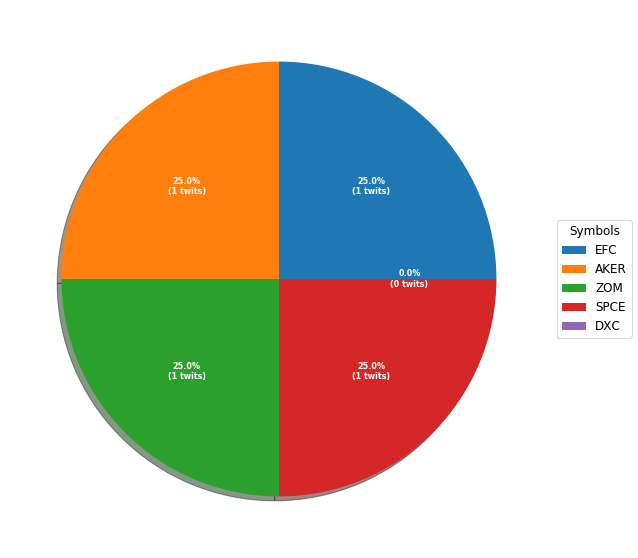

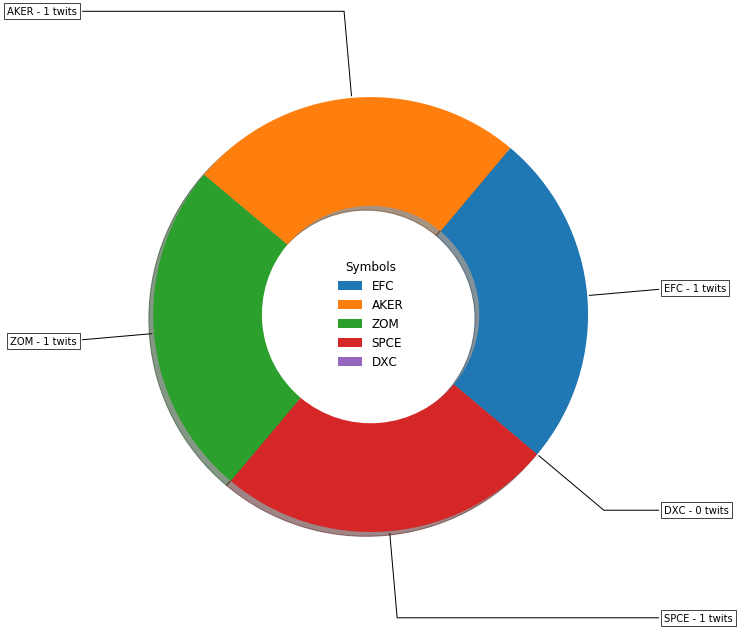

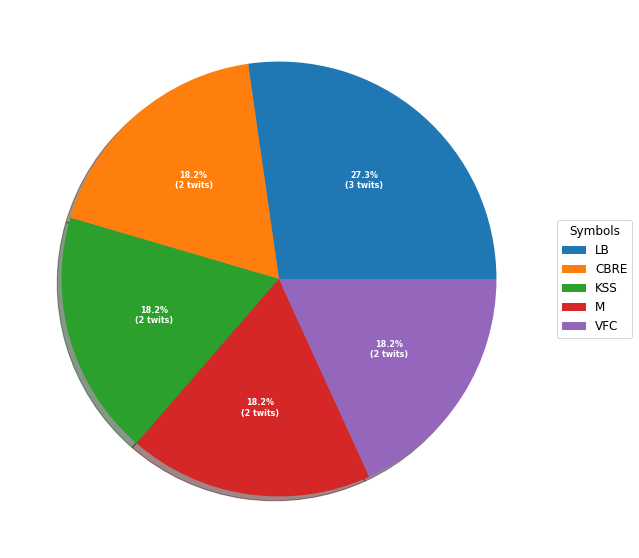

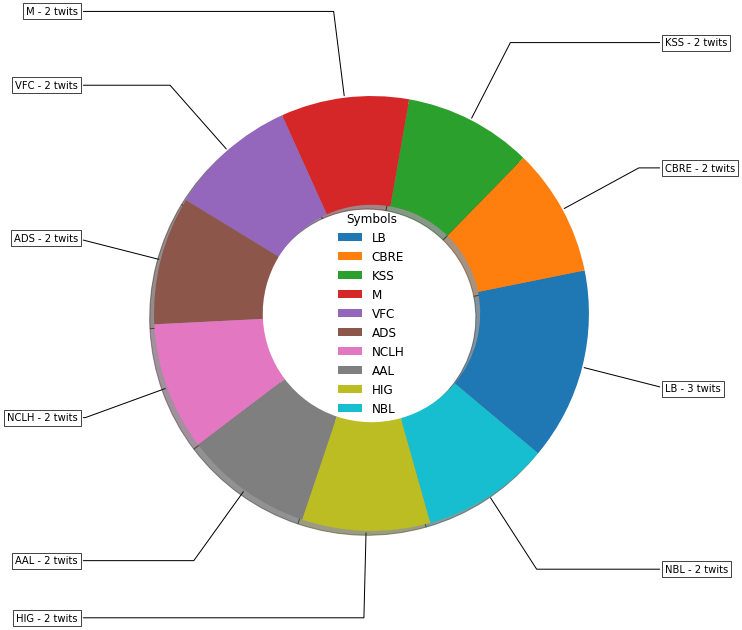

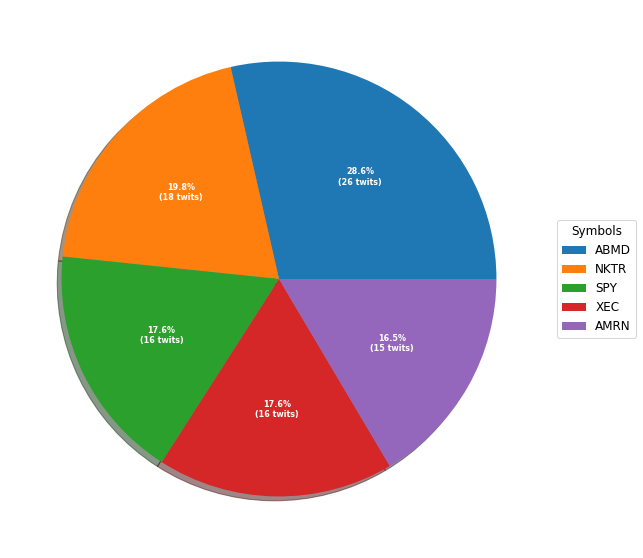

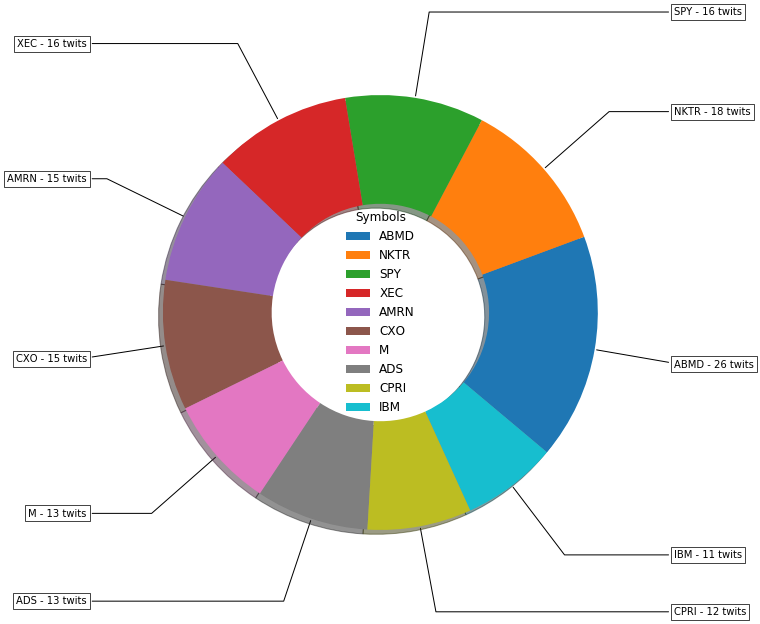

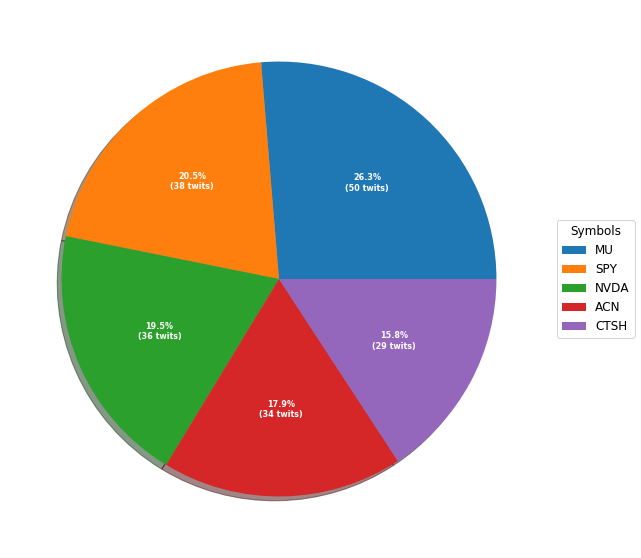

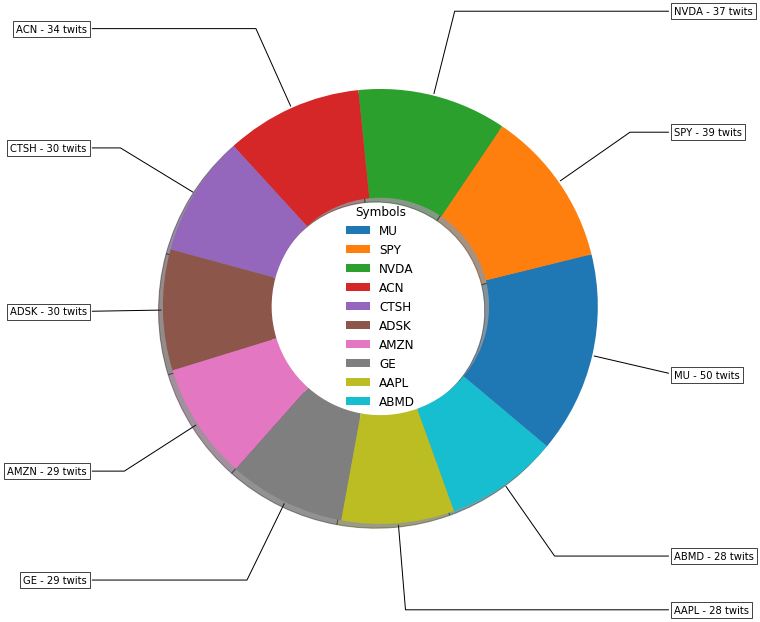

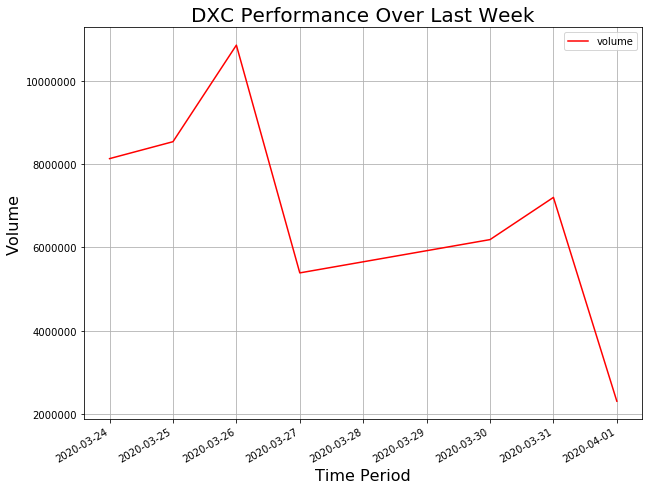

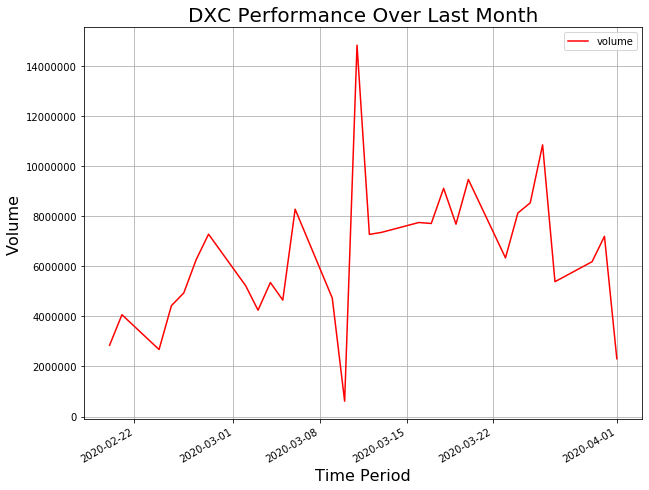

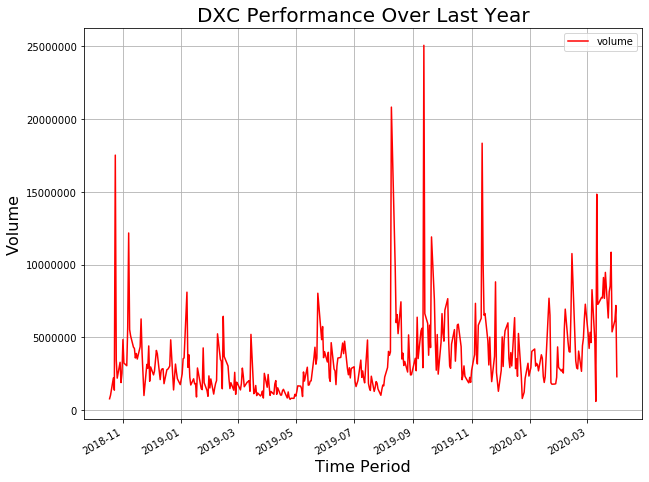

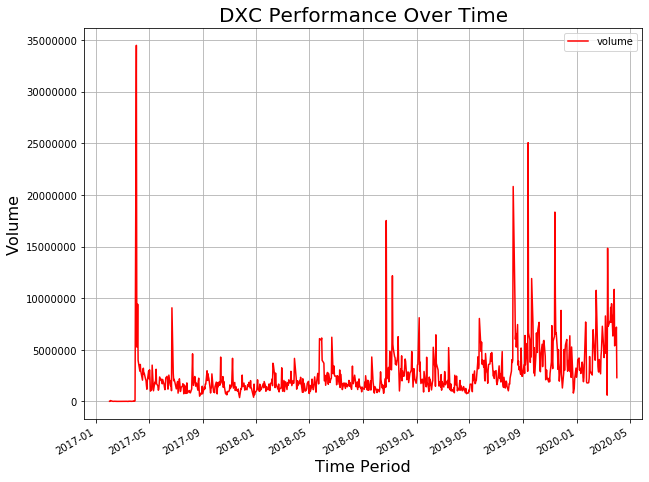

In [19]:
GetOtherCompanies('DXC_Twits.csv', days='lastWeek')
GetOtherCompanies('DXC_Twits.csv', days='lastMonth')
GetOtherCompanies('DXC_Twits.csv', days='lastYear')
GetOtherCompanies('DXC_Twits.csv')
GetVolume('DXCDaily.csv', days='lastWeek')
GetVolume('DXCDaily.csv', days='lastMonth')
GetVolume('DXCDaily.csv', days='lastYear')
GetVolume('DXCDaily.csv')

## TMO

saved TMOTopFiveOtherCompaniesLastWeek.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved TMOTopTenOtherCompaniesLastWeek.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved TMOTopFiveOtherCompaniesLastMonth.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved TMOTopTenOtherCompaniesLastMonth.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved TMOTopFiveOtherCompaniesLastYear.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved TMOTopTenOtherCompaniesLastYear.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved TMOTopFiveOtherCompaniesAllTime.png to C:\Users\Christopher Major\Desktop\Data Project\MaristYoungMen2020\visualization\WebsitePNGs
saved TMOTopTenOtherCompanies

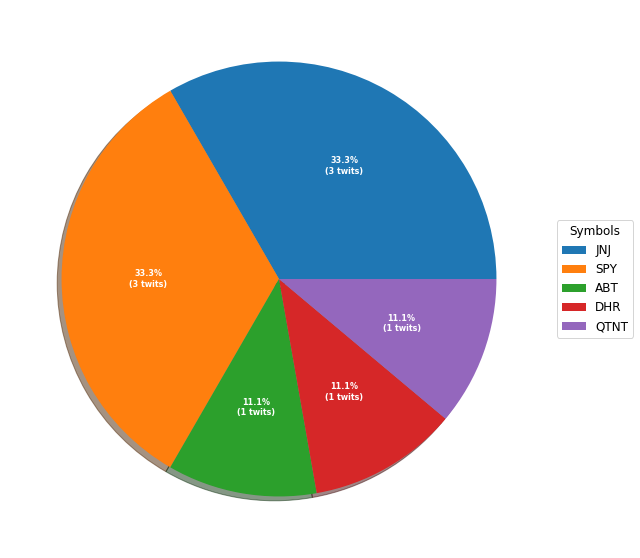

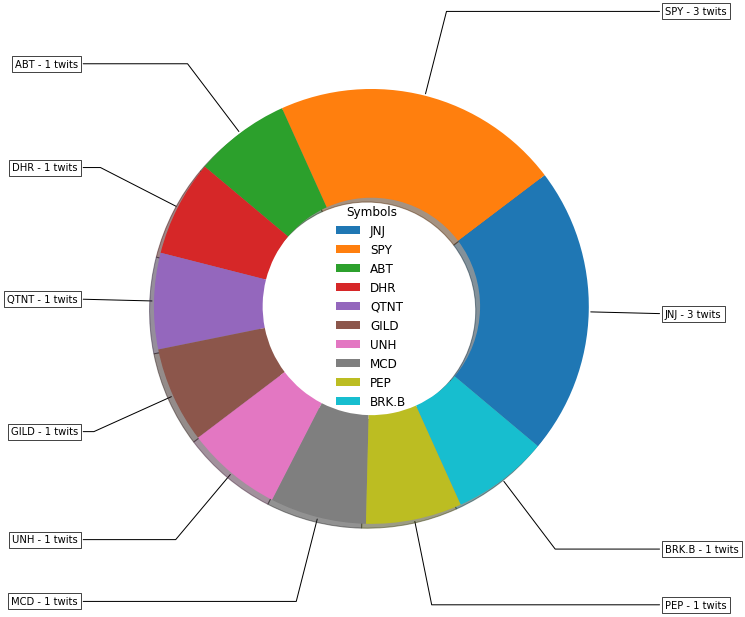

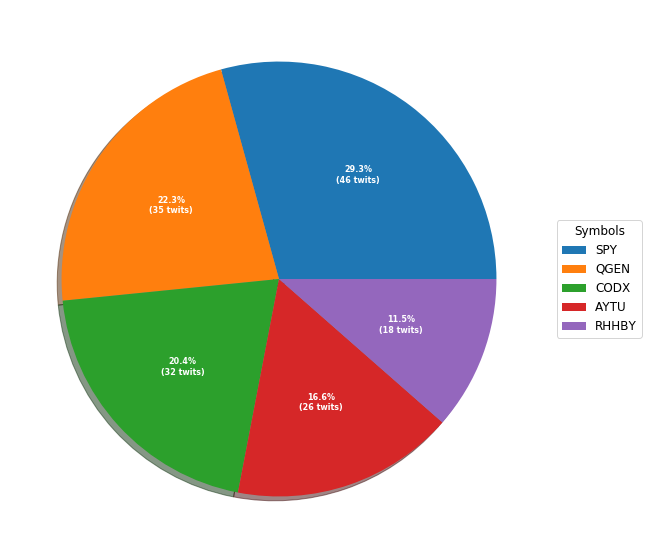

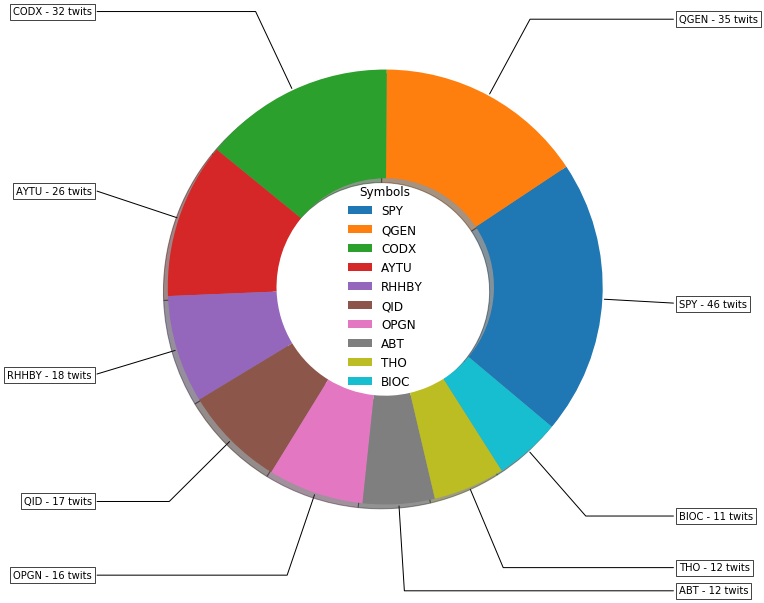

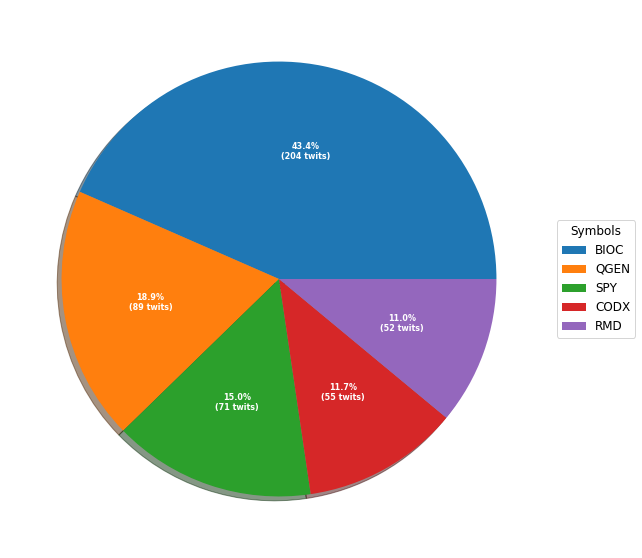

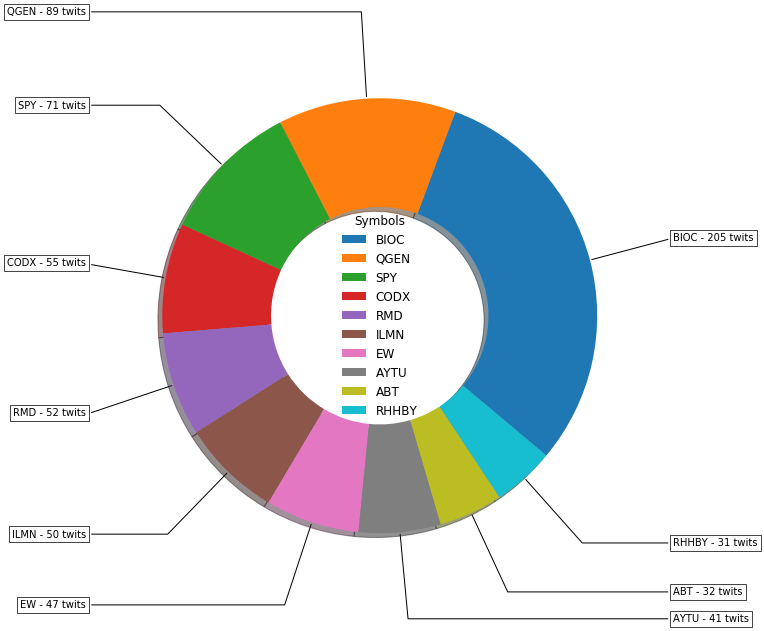

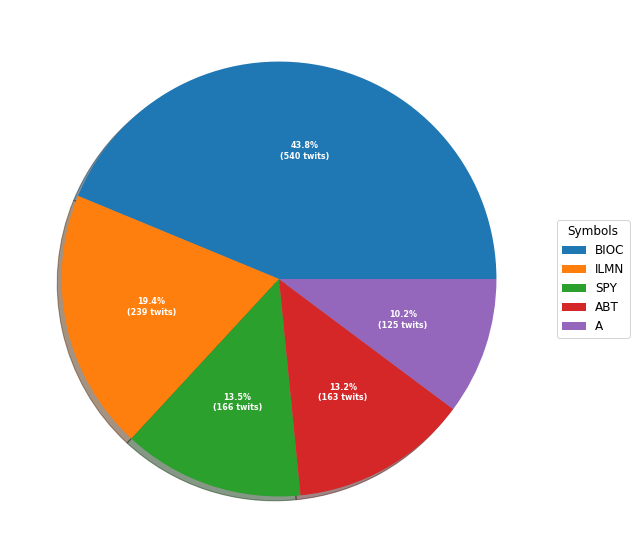

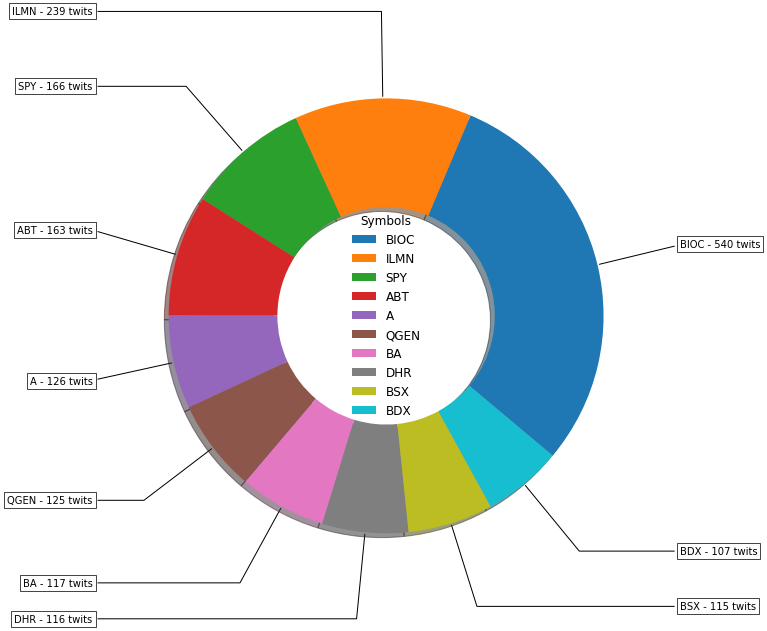

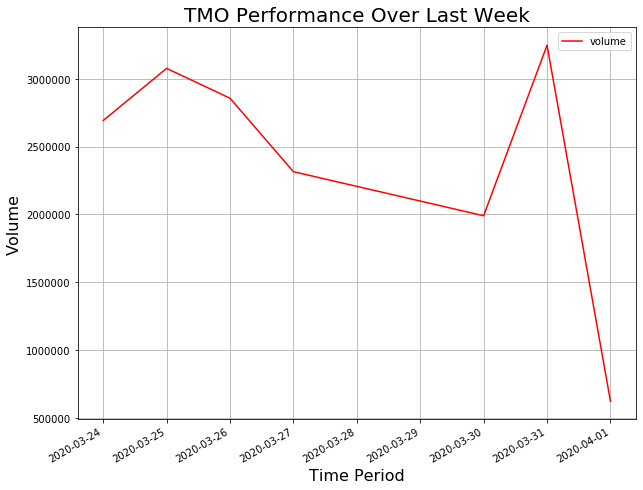

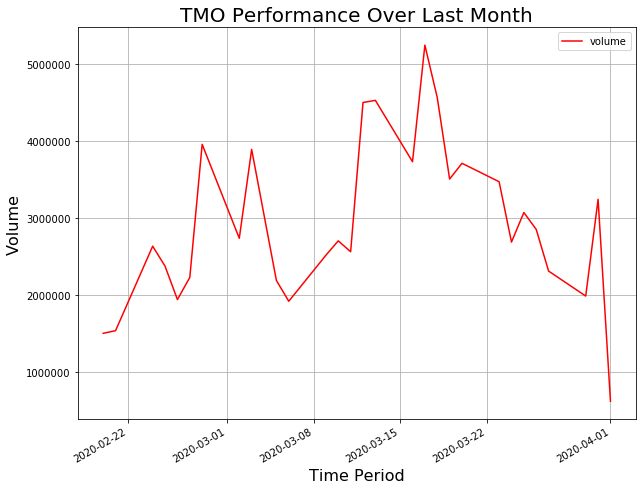

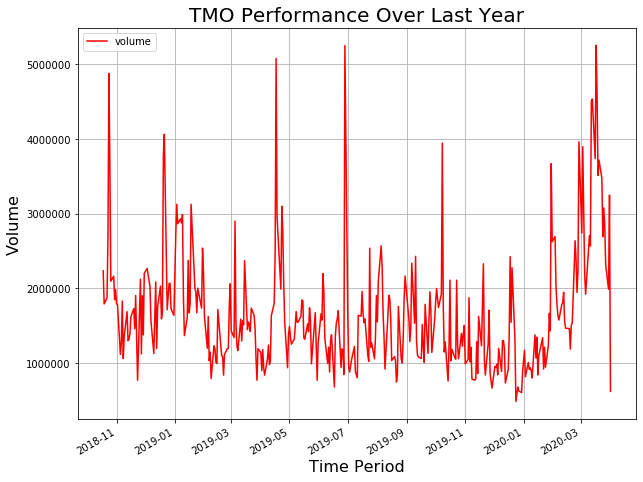

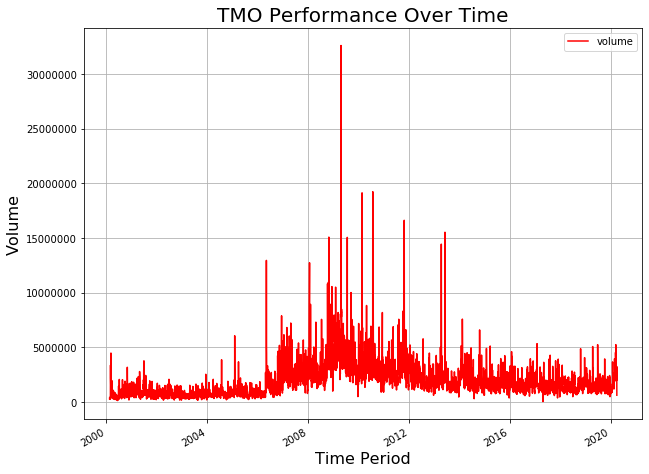

In [20]:
GetOtherCompanies('TMO_Twits.csv', days='lastWeek')
GetOtherCompanies('TMO_Twits.csv', days='lastMonth')
GetOtherCompanies('TMO_Twits.csv', days='lastYear')
GetOtherCompanies('TMO_Twits.csv')
GetVolume('TMODaily.csv', days='lastWeek')
GetVolume('TMODaily.csv', days='lastMonth')
GetVolume('TMODaily.csv', days='lastYear')
GetVolume('TMODaily.csv')